TP noté : Classifieur 20newsgroup
=======================

**AUGUSTYN Patricia**

Sorbonne Nouvelle

M2 TAL : Recherche et Développement

Cours : **Apprentissage Automatique** avec M. GROBOL Loic

### Étape 1 : Test des algorithmes

In [1]:
from sklearn.datasets import fetch_20newsgroups_vectorized
import numpy as np
import random

In [2]:
# Ici, nous allons mettre un seed nous permettre d'obtenir les mêmes résultats à chaque exécution du code
random.seed(42)
np.random.seed(42)

In [3]:

# On charge les données de 20newsgroups
newsgroups_train = fetch_20newsgroups_vectorized(subset="train", remove=("headers", "footers", "quotes"))
newsgroups_test = fetch_20newsgroups_vectorized(subset="test", remove=("headers", "footers", "quotes"))

# Et, on les stocke dans des variables 
X_train = newsgroups_train.data
X_test = newsgroups_test.data

y_train = newsgroups_train.target
y_test = newsgroups_test.target

print(f"X_train={X_train.shape}, y_train={y_train.shape}, X_test={X_test.shape}, y_test={y_test.shape}")

X_train=(11314, 101631), y_train=(11314,), X_test=(7532, 101631), y_test=(7532,)


In [4]:
from sklearn.metrics import classification_report, accuracy_score

# Importer les libraires de visualisation
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

# On reprend toujours notre fonction de classification
def classification_data(model, X_train, y_train, X_test, y_test, model_name):
    """
    Cette fonction permet d'entrainer et évaluer un modèle donné.
    
    Paramètres :
    - model: Le modèle d'apprentissage à entrainer.
    - X_train: Les données d'entraînement.
    - y_train: Les labels d'entraînement.
    - X_test: Les données de test.
    - y_test: Les labels de test.
    - model_name: Le nom de l'algorithme de classification.
    """
    print(" 🥁 Chargement ... 🥁")
    
    # Entraîne le modèle
    model.fit(X_train, y_train)
    
    # On va prédire notre modèle sur le jeu de test
    y_pred = model.predict(X_test)
    
    # Les résultats de la classication
    print(f"🎄 Résultat : {model_name} 🎄")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

    # On visualise avec la matrice de confusion
    print("🎨 Matrice de Confusion 🎨")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(15, 10))
    sns.heatmap(cm, fmt="d", annot=True, cmap="flare")
    plt.title("Matrice de Confusion")
    plt.xlabel("Prédiction")
    plt.ylabel("Réalité")
    plt.tight_layout()
    plt.show()

1) **Arbre de décision**

In [6]:
from sklearn.tree import DecisionTreeClassifier

 🥁 Chargement ... 🥁
🎄 Résultat : Arbre de Décision 🎄
              precision    recall  f1-score   support

           0       0.24      0.22      0.23       319
           1       0.39      0.41      0.40       389
           2       0.47      0.43      0.45       394
           3       0.34      0.33      0.34       392
           4       0.41      0.42      0.41       385
           5       0.49      0.42      0.45       395
           6       0.57      0.57      0.57       390
           7       0.30      0.51      0.38       396
           8       0.47      0.47      0.47       398
           9       0.45      0.44      0.45       397
          10       0.54      0.55      0.54       399
          11       0.57      0.47      0.51       396
          12       0.28      0.27      0.28       393
          13       0.42      0.37      0.39       396
          14       0.47      0.48      0.47       394
          15       0.44      0.46      0.45       398
          16       0.37     

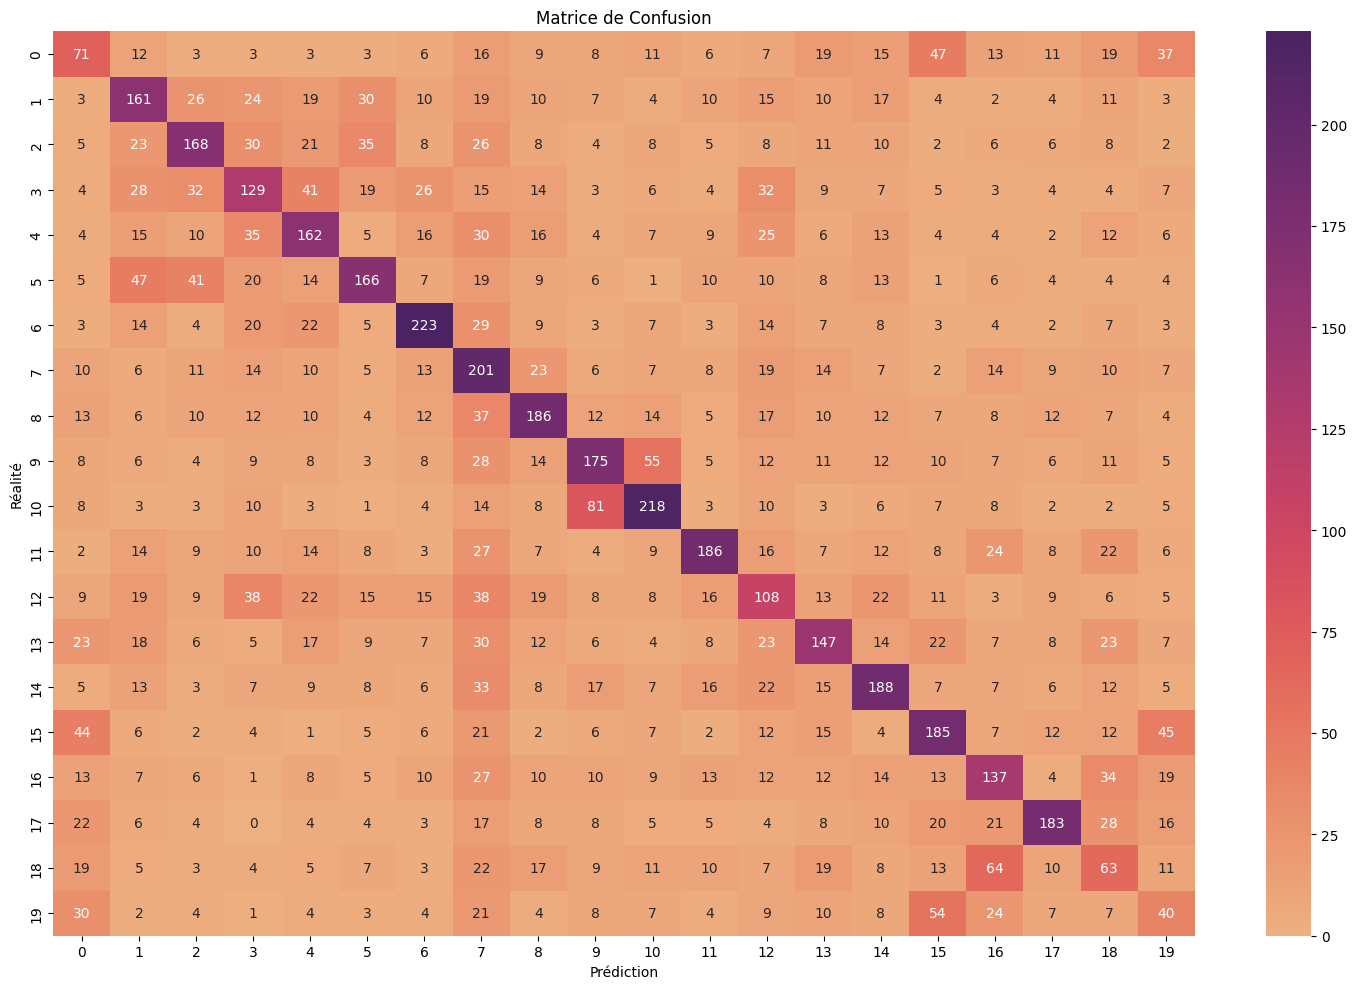

In [7]:
# Création du modèle --> 0.41 d'accuracy - 31 secondes
tree_model = DecisionTreeClassifier(random_state=42)

# On appelle notre fonction de classification
classification_data(tree_model, X_train, y_train, X_test, y_test, "Arbre de Décision")

2) **Random Forest**

In [8]:
from sklearn.ensemble import RandomForestClassifier

 🥁 Chargement ... 🥁
🎄 Résultat : Random Forest 🎄
              precision    recall  f1-score   support

           0       0.41      0.32      0.36       319
           1       0.52      0.59      0.55       389
           2       0.54      0.60      0.57       394
           3       0.58      0.56      0.57       392
           4       0.61      0.65      0.63       385
           5       0.70      0.65      0.67       395
           6       0.70      0.78      0.74       390
           7       0.39      0.63      0.48       396
           8       0.62      0.66      0.64       398
           9       0.57      0.73      0.64       397
          10       0.74      0.82      0.78       399
          11       0.73      0.65      0.69       396
          12       0.51      0.36      0.42       393
          13       0.71      0.56      0.63       396
          14       0.64      0.64      0.64       394
          15       0.54      0.74      0.62       398
          16       0.52      0.5

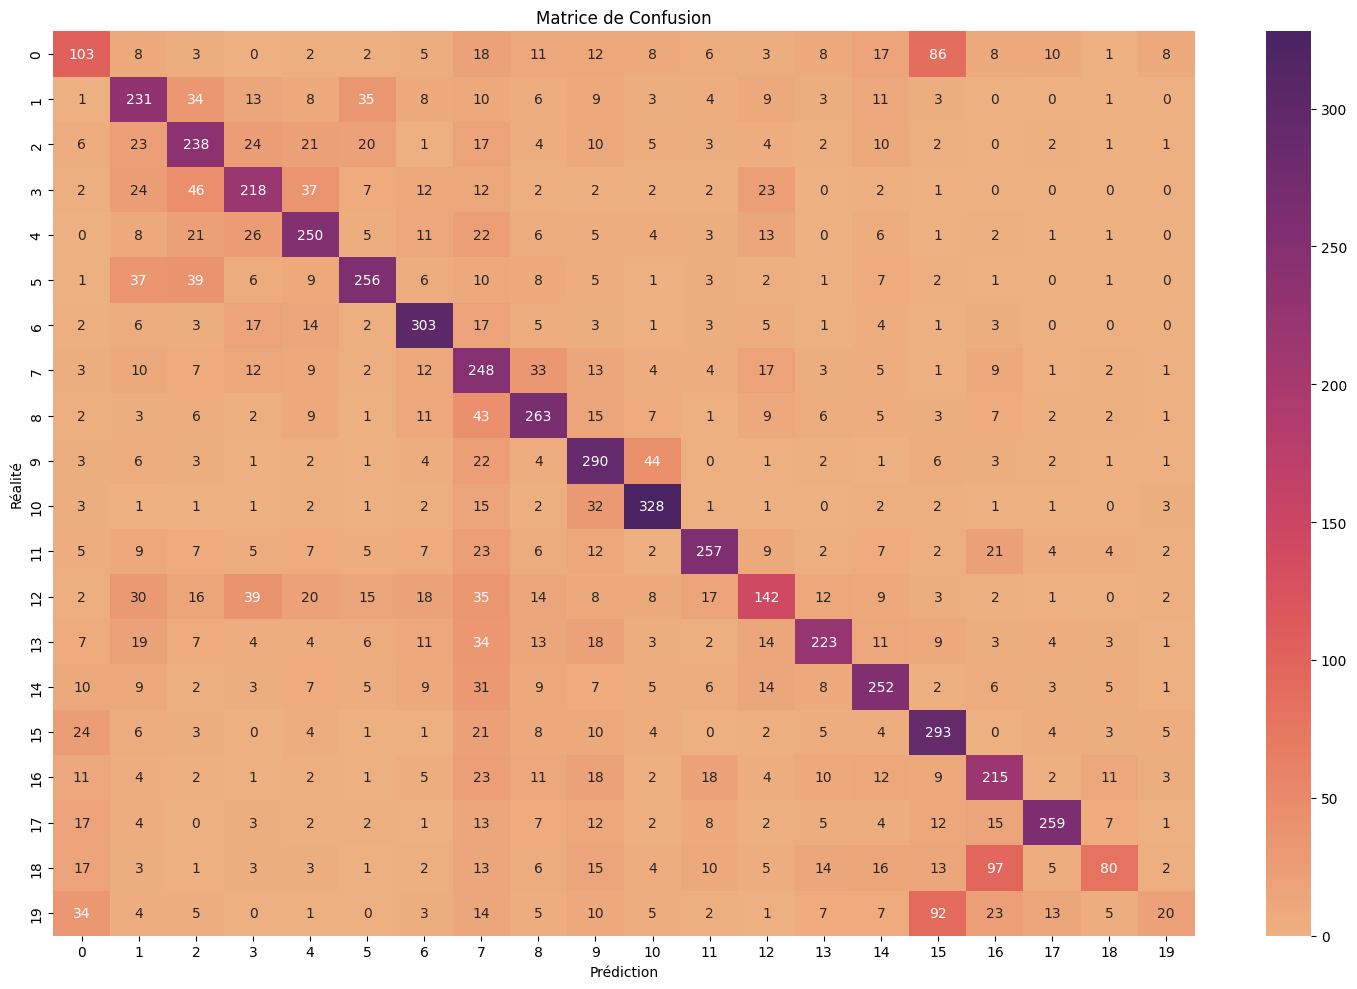

In [9]:
# Création du modèle --> 0.59 d'accuracy - 1 minute et 52 secondes

# L'augmentation de cet hyperparamètre améliore généralement les performances du modèle
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# On appelle notre fonction de classification
classification_data(random_forest, X_train, y_train, X_test, y_test, "Random Forest")

3) **Naïve Bayes**

In [10]:
from sklearn.naive_bayes import MultinomialNB

 🥁 Chargement ... 🥁
🎄 Résultat : Naïve Bayes 🎄
              precision    recall  f1-score   support

           0       0.80      0.03      0.05       319
           1       0.67      0.49      0.56       389
           2       0.73      0.39      0.51       394
           3       0.45      0.77      0.57       392
           4       0.88      0.36      0.51       385
           5       0.74      0.69      0.71       395
           6       0.82      0.68      0.74       390
           7       0.83      0.52      0.64       396
           8       0.88      0.41      0.56       398
           9       0.91      0.47      0.62       397
          10       0.55      0.77      0.64       399
          11       0.40      0.75      0.52       396
          12       0.66      0.28      0.40       393
          13       0.74      0.55      0.63       396
          14       0.81      0.42      0.56       394
          15       0.15      0.94      0.25       398
          16       0.61      0.29 

/home/patricia/Desktop/universite/master_2/apprentissage_automatique/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/patricia/Desktop/universite/master_2/apprentissage_automatique/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/patricia/Desktop/universite/master_2/apprentissage_automatique/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predi

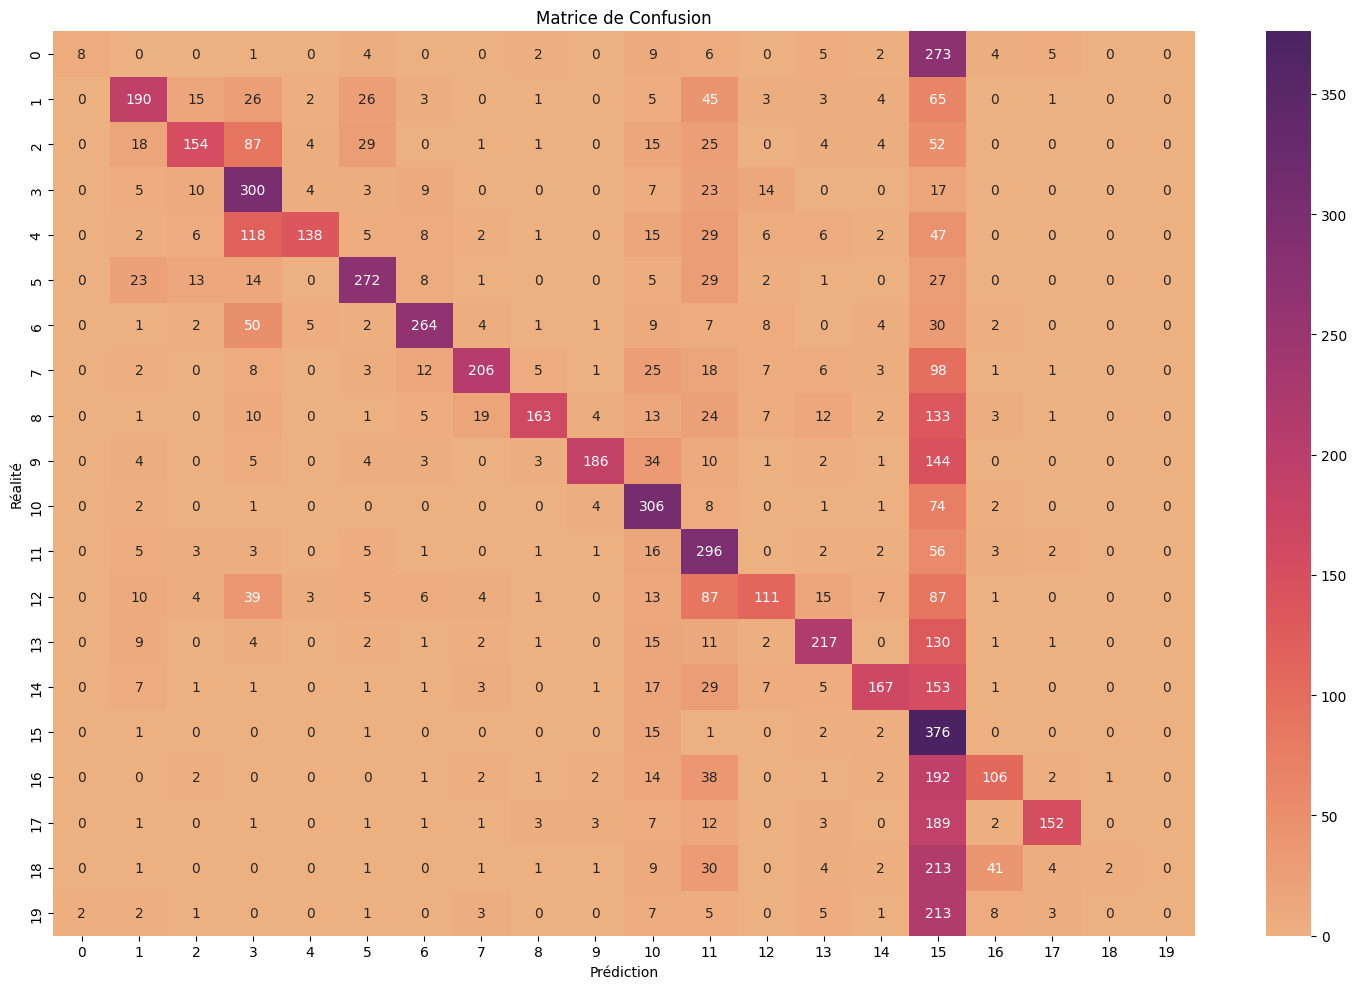

In [11]:
# Création du modèle --> 0.47 d'accuracy - 1 seconde

# En ajoutant des hyperparamètres (comme alpha), cela baissait
naive_bayes = MultinomialNB()

# On appelle notre fonction de classification
classification_data(naive_bayes, X_train, y_train, X_test, y_test, "Naïve Bayes")

4) **Perceptron**

In [12]:
from sklearn.linear_model import Perceptron

 🥁 Chargement ... 🥁
🎄 Résultat : Perceptron 🎄
              precision    recall  f1-score   support

           0       0.56      0.26      0.36       319
           1       0.57      0.54      0.56       389
           2       0.66      0.44      0.53       394
           3       0.53      0.58      0.55       392
           4       0.64      0.59      0.61       385
           5       0.63      0.65      0.64       395
           6       0.78      0.70      0.74       390
           7       0.39      0.74      0.51       396
           8       0.65      0.64      0.64       398
           9       0.82      0.57      0.67       397
          10       0.70      0.84      0.77       399
          11       0.42      0.76      0.54       396
          12       0.62      0.38      0.47       393
          13       0.81      0.56      0.66       396
          14       0.78      0.55      0.64       394
          15       0.75      0.44      0.56       398
          16       0.62      0.34  

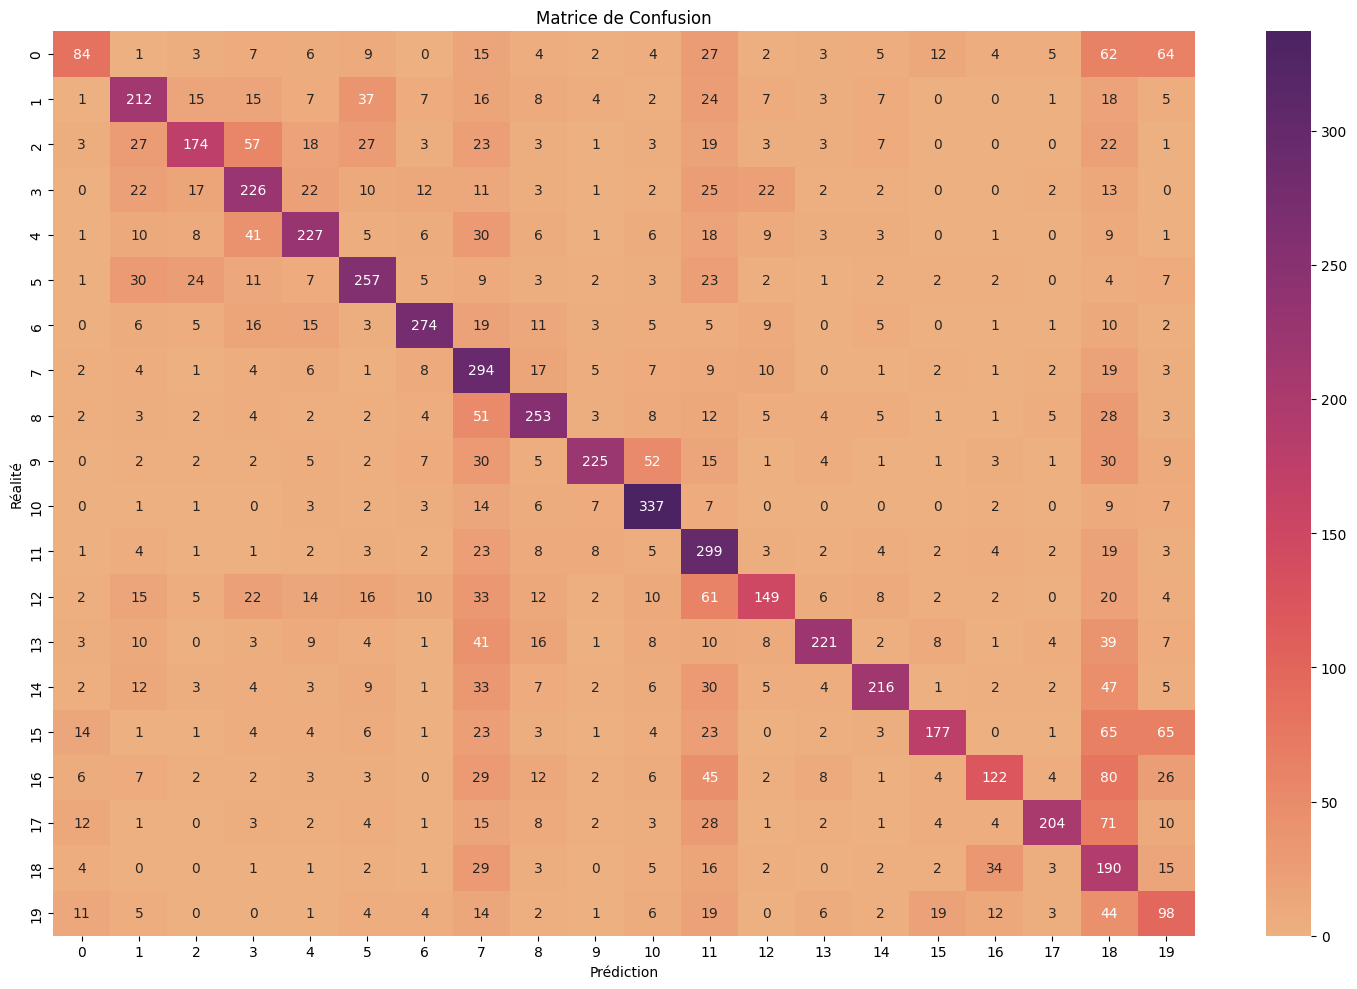

In [13]:
# Création du modèle --> 0.56 d'accuracy - 2 secondes

# L'augmentation de cet hyperparamètre améliore généralement les performances du modèle car il détermine le nombre maximal de passages sur les données d'entraînement (pour ajuster les poids du perceptron).
perceptron = Perceptron(max_iter=1000, random_state=42)

# On appelle notre fonction de classification
classification_data(perceptron, X_train, y_train, X_test, y_test, "Perceptron")


5) **Support Vector Machine**

In [14]:
from sklearn.svm import SVC

 🥁 Chargement ... 🥁
🎄 Résultat : Support Vector Machine 🎄
              precision    recall  f1-score   support

           0       0.32      0.37      0.34       319
           1       0.52      0.63      0.57       389
           2       0.62      0.52      0.57       394
           3       0.58      0.54      0.56       392
           4       0.62      0.52      0.57       385
           5       0.76      0.57      0.65       395
           6       0.74      0.74      0.74       390
           7       0.50      0.60      0.54       396
           8       0.54      0.59      0.56       398
           9       0.42      0.69      0.52       397
          10       0.86      0.76      0.80       399
          11       0.74      0.53      0.61       396
          12       0.44      0.50      0.47       393
          13       0.59      0.54      0.56       396
          14       0.57      0.61      0.59       394
          15       0.58      0.71      0.64       398
          16       0.50

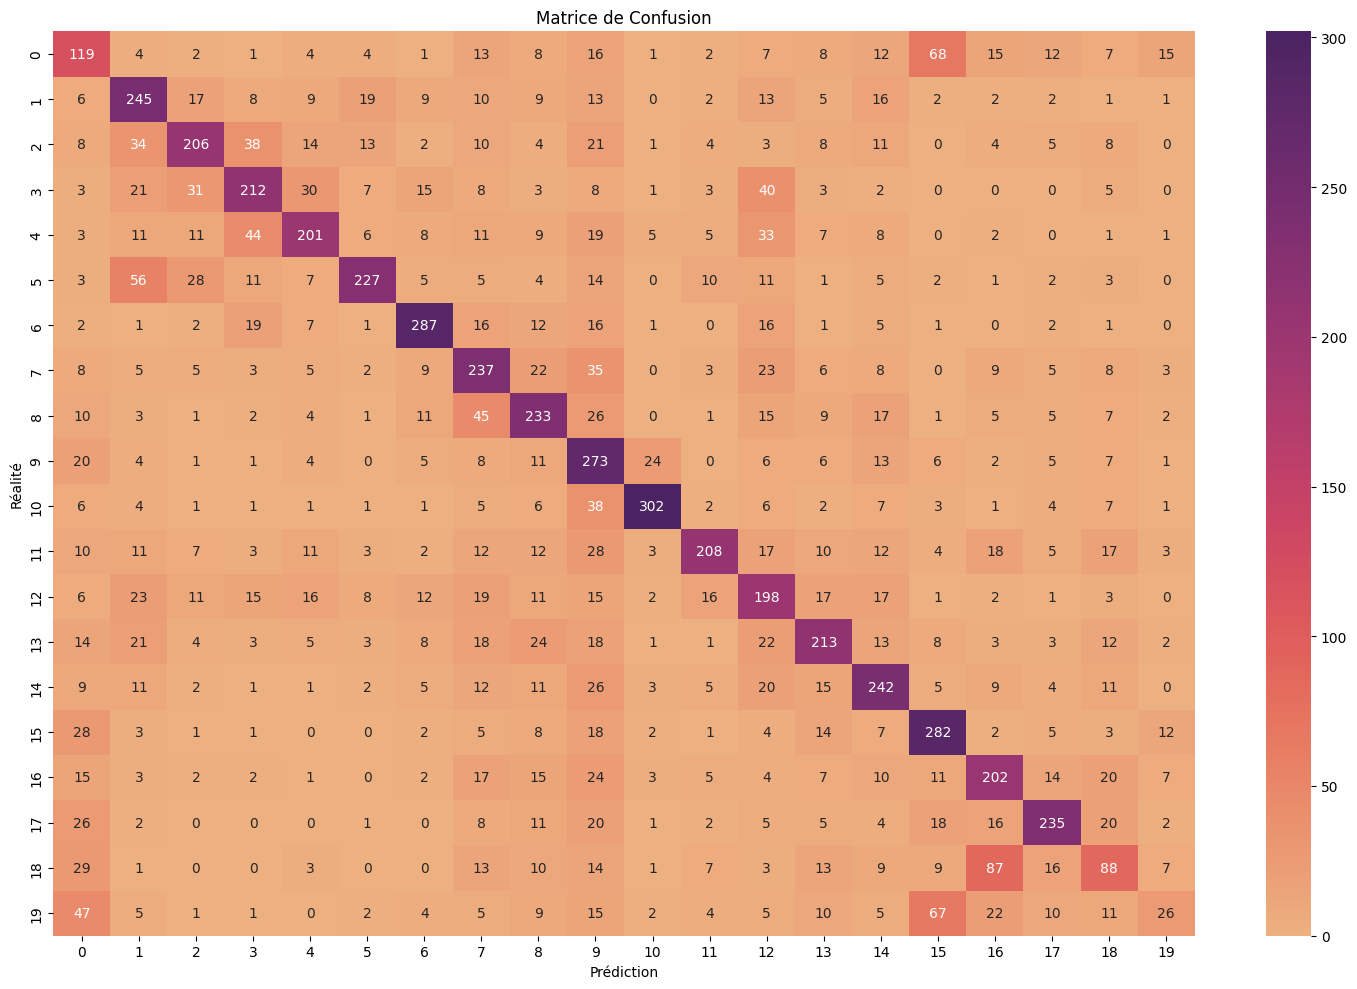

In [15]:
# Création du modèle --> 0.56 d'accuracy - 4 minutes 23 secondes 

# On fait une séparation linéaire pour le SVM afin que le modèle soit plus rapide
svm = SVC(kernel="linear", random_state=42)

# On appelle notre fonction de classification
classification_data(svm, X_train, y_train, X_test, y_test, "Support Vector Machine")


6) **Linear SVC**

In [16]:
from sklearn.svm import LinearSVC

 🥁 Chargement ... 🥁
🎄 Résultat : Linear SVC 🎄
              precision    recall  f1-score   support

           0       0.50      0.45      0.47       319
           1       0.62      0.66      0.64       389
           2       0.62      0.61      0.61       394
           3       0.61      0.62      0.62       392
           4       0.72      0.66      0.69       385
           5       0.80      0.67      0.73       395
           6       0.75      0.78      0.77       390
           7       0.73      0.67      0.70       396
           8       0.77      0.72      0.74       398
           9       0.52      0.80      0.63       397
          10       0.84      0.86      0.85       399
          11       0.78      0.70      0.74       396
          12       0.58      0.55      0.56       393
          13       0.74      0.74      0.74       396
          14       0.71      0.70      0.70       394
          15       0.62      0.80      0.70       398
          16       0.56      0.63  

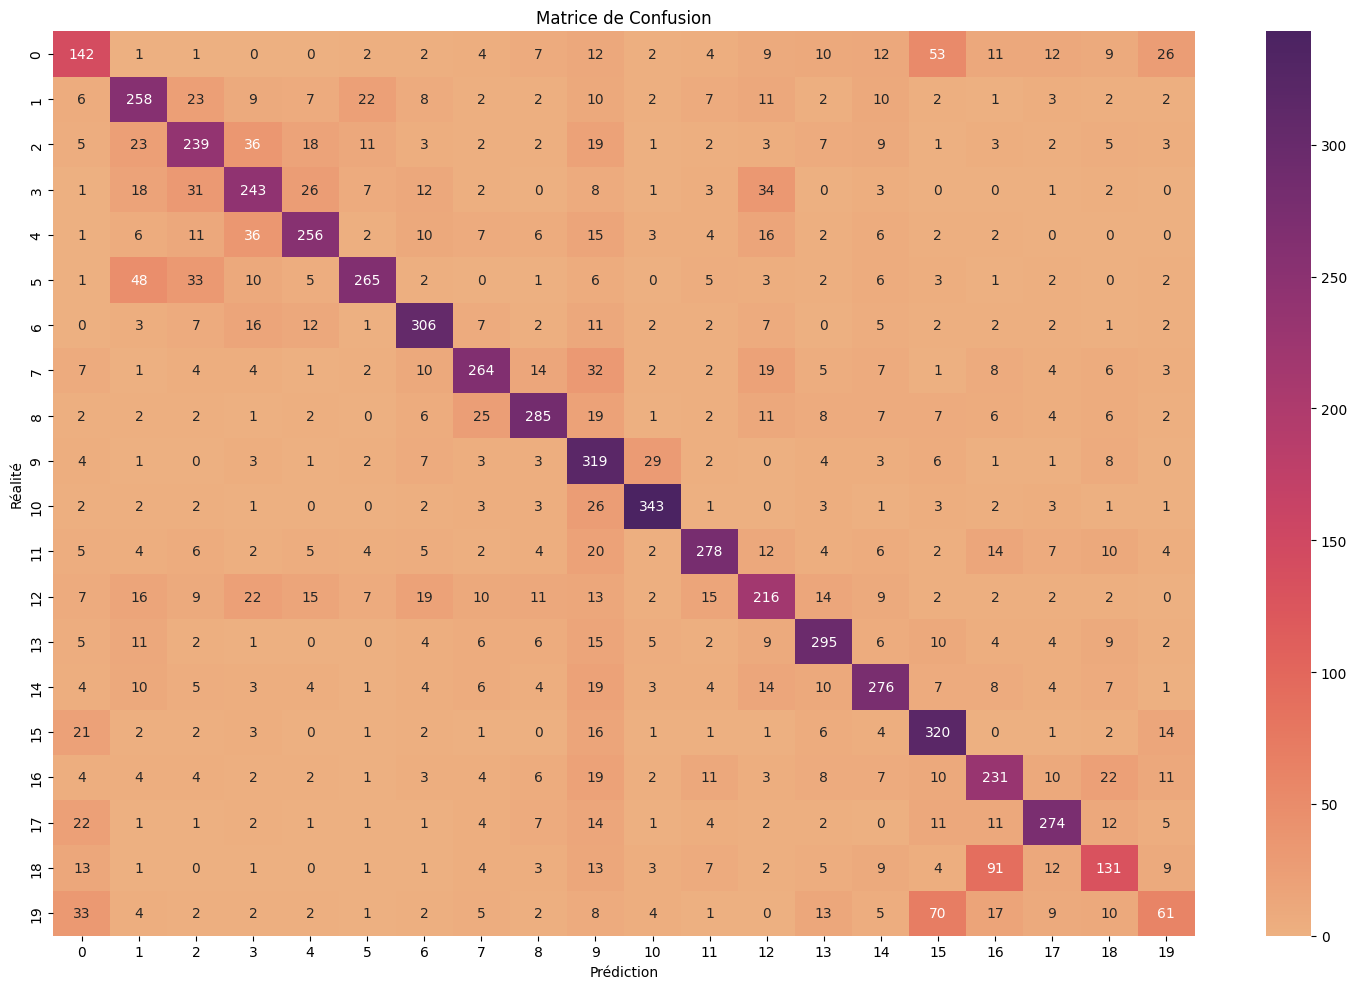

In [17]:

# Création du modèle --> 0.66 d'accuracy - 4 secondes 

svc = LinearSVC()

classification_data(svc, X_train, y_train, X_test, y_test, "Linear SVC")

7) **Régression de logistique**

In [18]:
from sklearn.linear_model import LogisticRegression 

 🥁 Chargement ... 🥁
🎄 Résultat : Régression Logistique 🎄
              precision    recall  f1-score   support

           0       0.33      0.34      0.34       319
           1       0.54      0.62      0.58       389
           2       0.60      0.52      0.56       394
           3       0.59      0.52      0.55       392
           4       0.60      0.54      0.57       385
           5       0.66      0.59      0.62       395
           6       0.64      0.76      0.70       390
           7       0.60      0.56      0.58       396
           8       0.55      0.58      0.57       398
           9       0.41      0.66      0.51       397
          10       0.76      0.78      0.77       399
          11       0.68      0.56      0.62       396
          12       0.47      0.46      0.46       393
          13       0.53      0.57      0.55       396
          14       0.63      0.60      0.62       394
          15       0.55      0.71      0.62       398
          16       0.47 

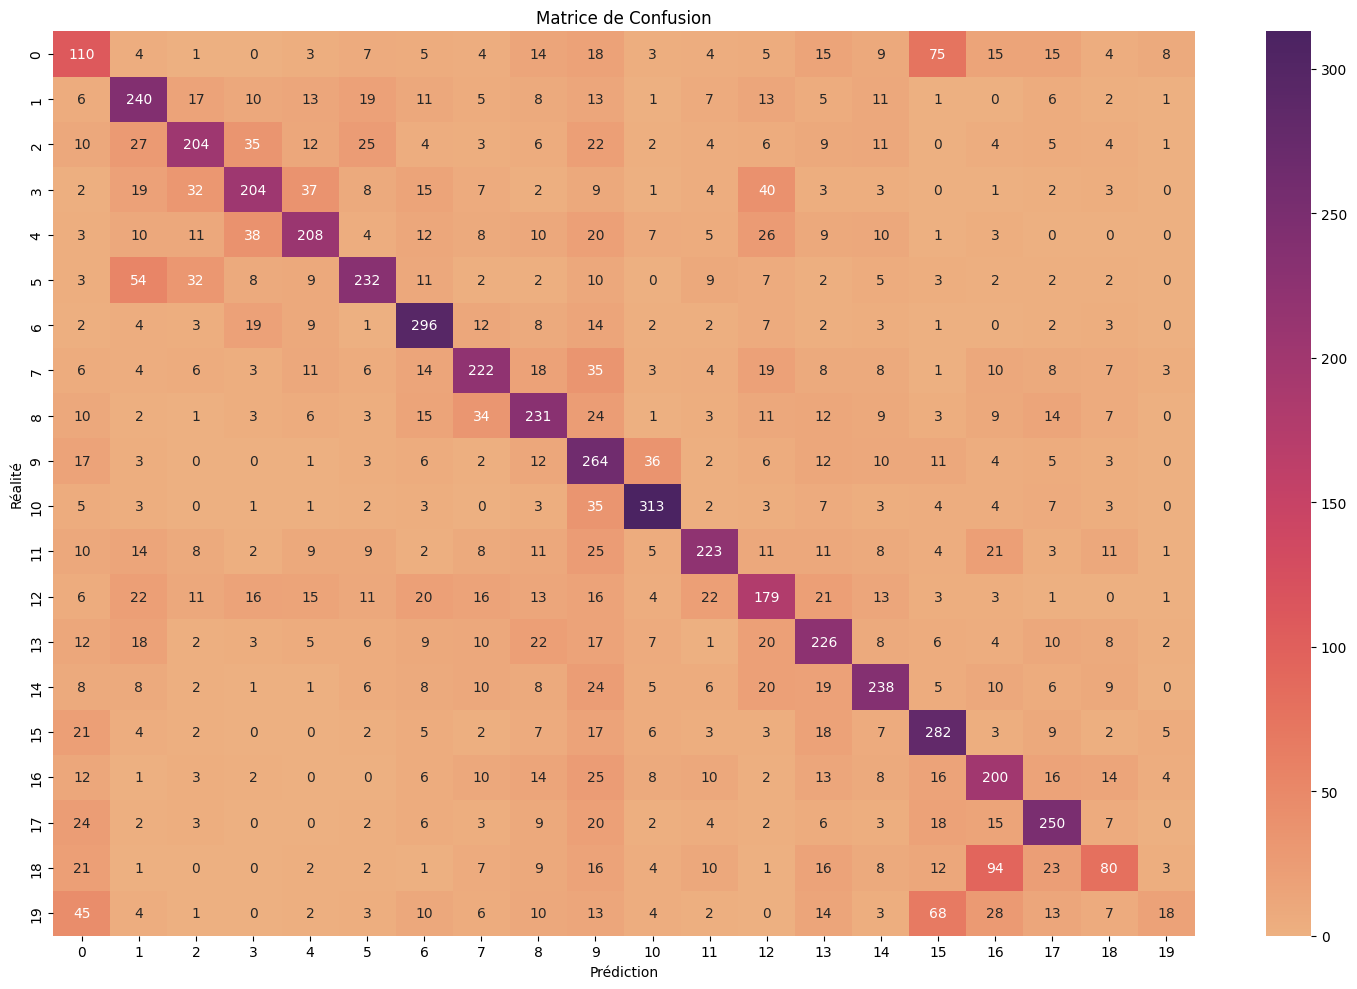

In [ ]:
# Création du modèle --> 0.56 d'accuracy - 50 secondes
log_reg = LogisticRegression()

# On appelle notre fonction de classification
classification_data(log_reg, X_train, y_train, X_test, y_test, "Régression Logistique")

8) **Complement NB**

In [10]:
from sklearn.naive_bayes import ComplementNB

 🥁 Chargement ... 🥁
🎄 Résultat : Complement Naive Bayes 🎄
              precision    recall  f1-score   support

           0       0.27      0.32      0.29       319
           1       0.71      0.70      0.70       389
           2       0.70      0.60      0.65       394
           3       0.64      0.71      0.67       392
           4       0.79      0.68      0.73       385
           5       0.79      0.78      0.79       395
           6       0.71      0.82      0.76       390
           7       0.82      0.71      0.76       396
           8       0.84      0.77      0.80       398
           9       0.89      0.81      0.85       397
          10       0.85      0.93      0.89       399
          11       0.73      0.77      0.75       396
          12       0.71      0.53      0.60       393
          13       0.80      0.81      0.80       396
          14       0.78      0.77      0.78       394
          15       0.42      0.90      0.57       398
          16       0.57

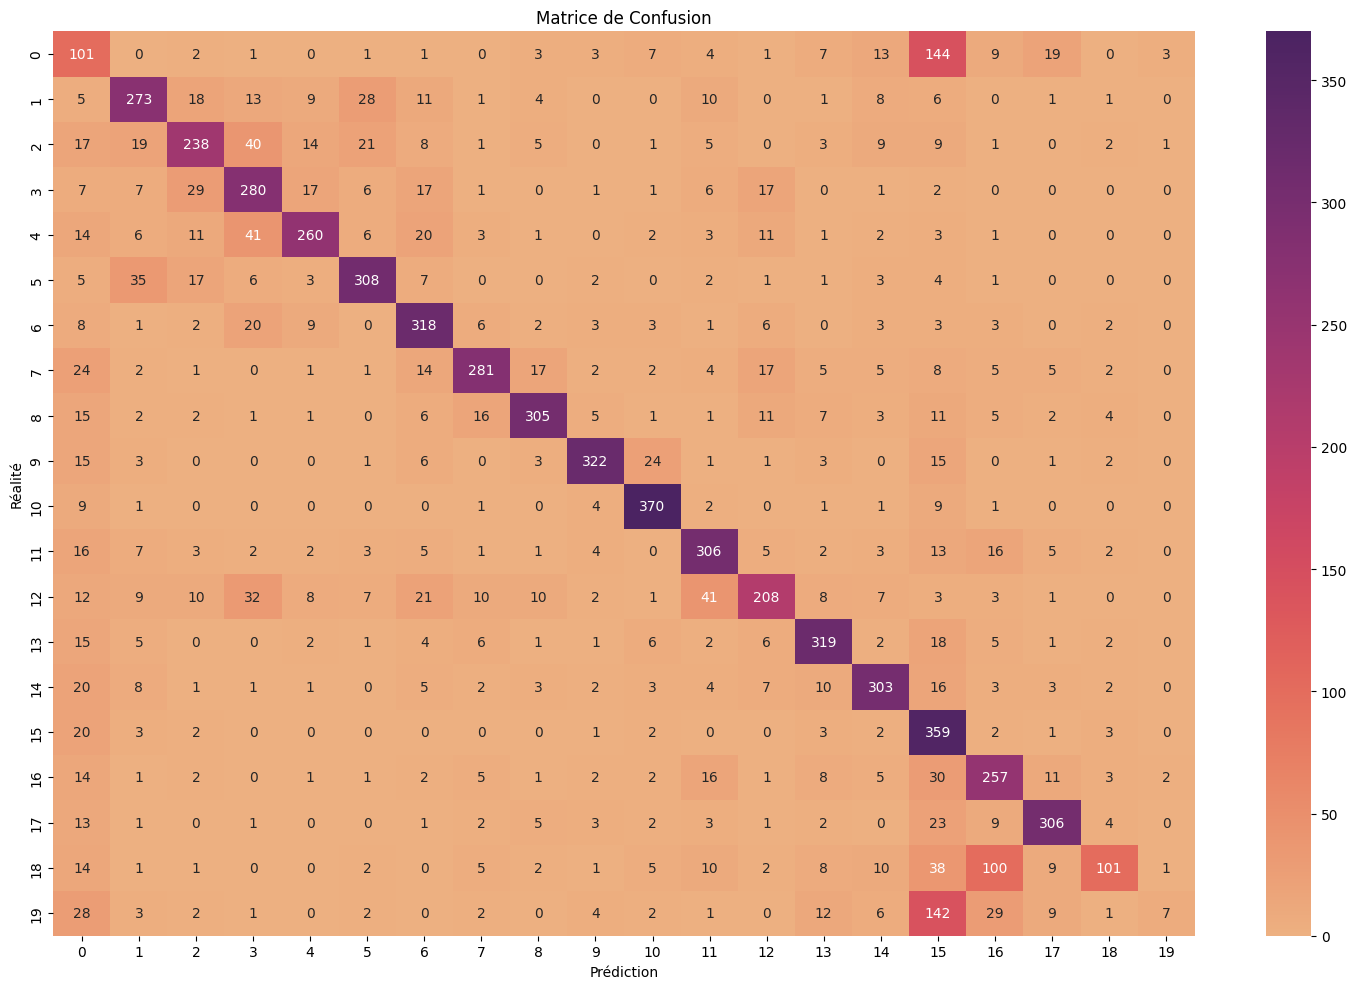

In [11]:
# Création du modèle --> 0.69 d'accuracy - 1 seconde

complemet_nb = ComplementNB()
classification_data(complemet_nb, X_train, y_train, X_test, y_test, "Complement Naive Bayes")

## Étape 2 : Utilisation de subset="all"

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Charger toutes les données
data_20n = fetch_20newsgroups_vectorized(subset="all", remove=("headers", "footers", "quotes"))
X, y = data_20n.data, data_20n.target

# Division en train et test : 70% entraînement et 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train={X_train.shape}, y_train={y_train.shape}, X_test={X_test.shape}, y_test={y_test.shape}")


X_train=(13192, 101631), y_train=(13192,), X_test=(5654, 101631), y_test=(5654,)


In [14]:
def classification(model, X_train, y_train, X_test, y_test, model_name):
    """
    Cette fonction permet d'entrainer et évaluer un modèle donné.
    
    Paramètres :
    - model: Le modèle d'apprentissage à entrainer.
    - X_train: Les données d'entraînement.
    - y_train: Les labels d'entraînement.
    - X_test: Les données de test.
    - y_test: Les labels de test.
    - model_name: Le nom de l'algorithme de classification.
    """
    print(" 🥁 Chargement ... 🥁")
    
    # On entraine notre modèle
    model.fit(X_train, y_train)
    
    # On prédit les labels sur le jeu de test
    y_pred = model.predict(X_test)
    
    # On affiche les résultats de la classifcations
    print(f"🎄 Résultat : {model_name} 🎄")
    print(classification_report(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))


    # On affiche notre matrice de confusion
    print("🎨 Matrice de Confusion 🎨")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(15, 10))
    sns.heatmap(cm, fmt="d", annot=True, cmap="flare")
    plt.title("Matrice de Confusion")
    plt.xlabel("Prédiction")
    plt.ylabel("Réalité")
    plt.tight_layout()
    plt.show()


1) **Arbre de décision**

 🥁 Chargement ... 🥁
🎄 Résultat : Arbre de Décision 🎄
              precision    recall  f1-score   support

           0       0.27      0.28      0.28       240
           1       0.39      0.41      0.40       296
           2       0.46      0.41      0.43       319
           3       0.42      0.45      0.43       287
           4       0.46      0.41      0.43       273
           5       0.56      0.48      0.51       324
           6       0.58      0.53      0.55       292
           7       0.34      0.52      0.41       308
           8       0.51      0.46      0.48       291
           9       0.54      0.52      0.53       295
          10       0.59      0.61      0.60       288
          11       0.60      0.52      0.56       314
          12       0.33      0.33      0.33       287
          13       0.49      0.50      0.49       294
          14       0.51      0.50      0.50       289
          15       0.48      0.45      0.46       294
          16       0.40     

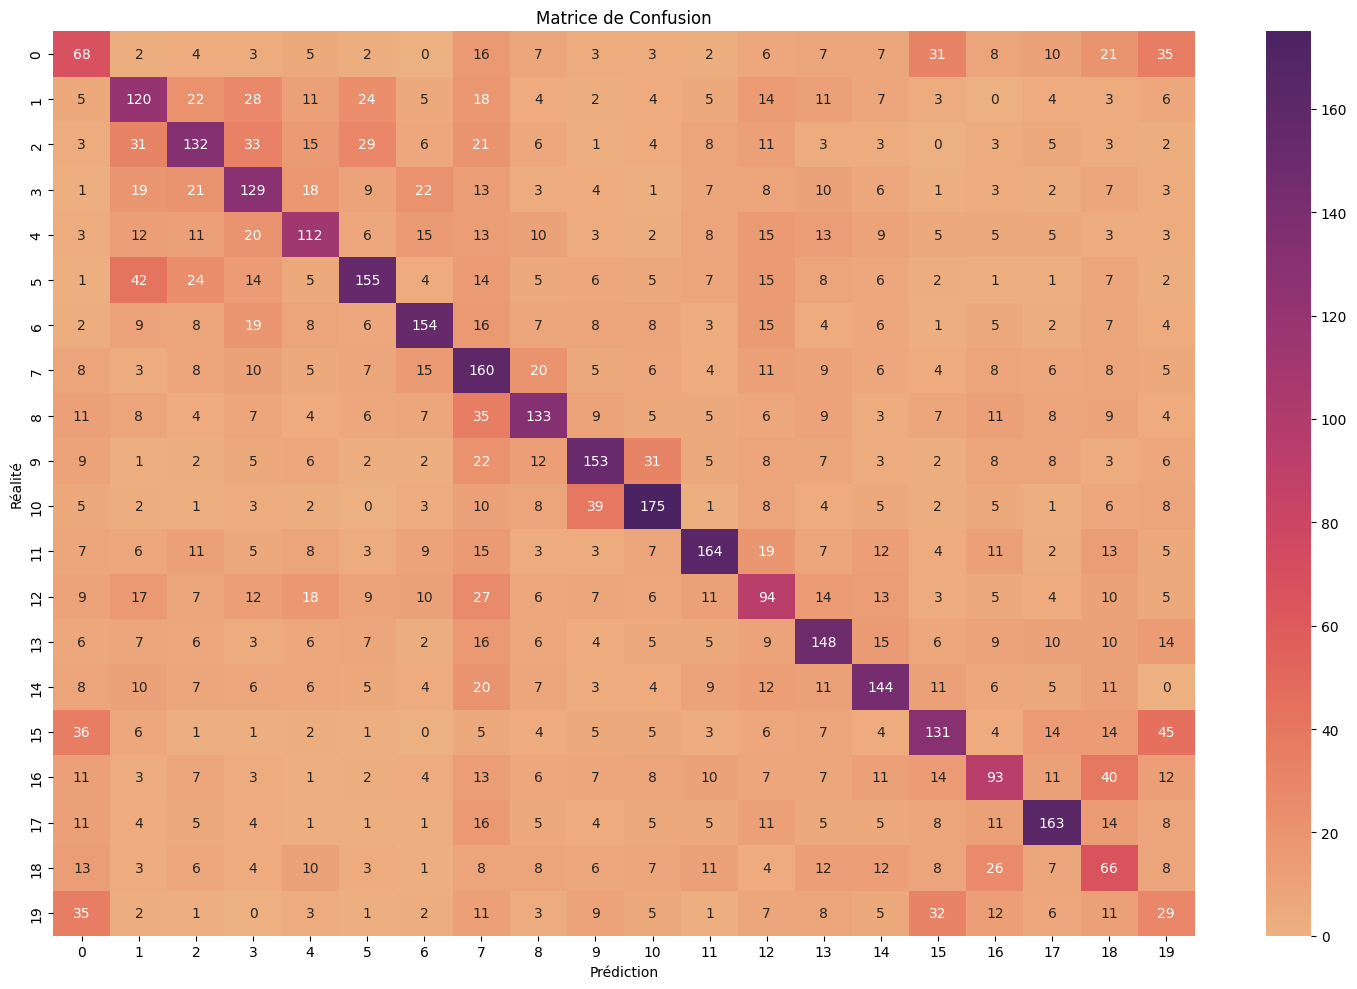

In [23]:
# Création du modèle --> 0.44 d'accuracy - 30 secondes
tree_model = DecisionTreeClassifier(random_state=42)

# On appelle notre fonction de classification
classification(tree_model, X_train, y_train, X_test, y_test, "Arbre de Décision")

2) **Random Forest**

 🥁 Chargement ... 🥁
🎄 Résultat : Random Forest 🎄
              precision    recall  f1-score   support

           0       0.46      0.41      0.43       240
           1       0.57      0.61      0.59       296
           2       0.62      0.62      0.62       319
           3       0.59      0.64      0.62       287
           4       0.65      0.67      0.66       273
           5       0.76      0.71      0.73       324
           6       0.76      0.77      0.76       292
           7       0.46      0.69      0.55       308
           8       0.59      0.66      0.62       291
           9       0.70      0.74      0.72       295
          10       0.76      0.85      0.80       288
          11       0.78      0.73      0.75       314
          12       0.61      0.50      0.55       287
          13       0.76      0.71      0.74       294
          14       0.75      0.72      0.73       289
          15       0.60      0.77      0.68       294
          16       0.60      0.6

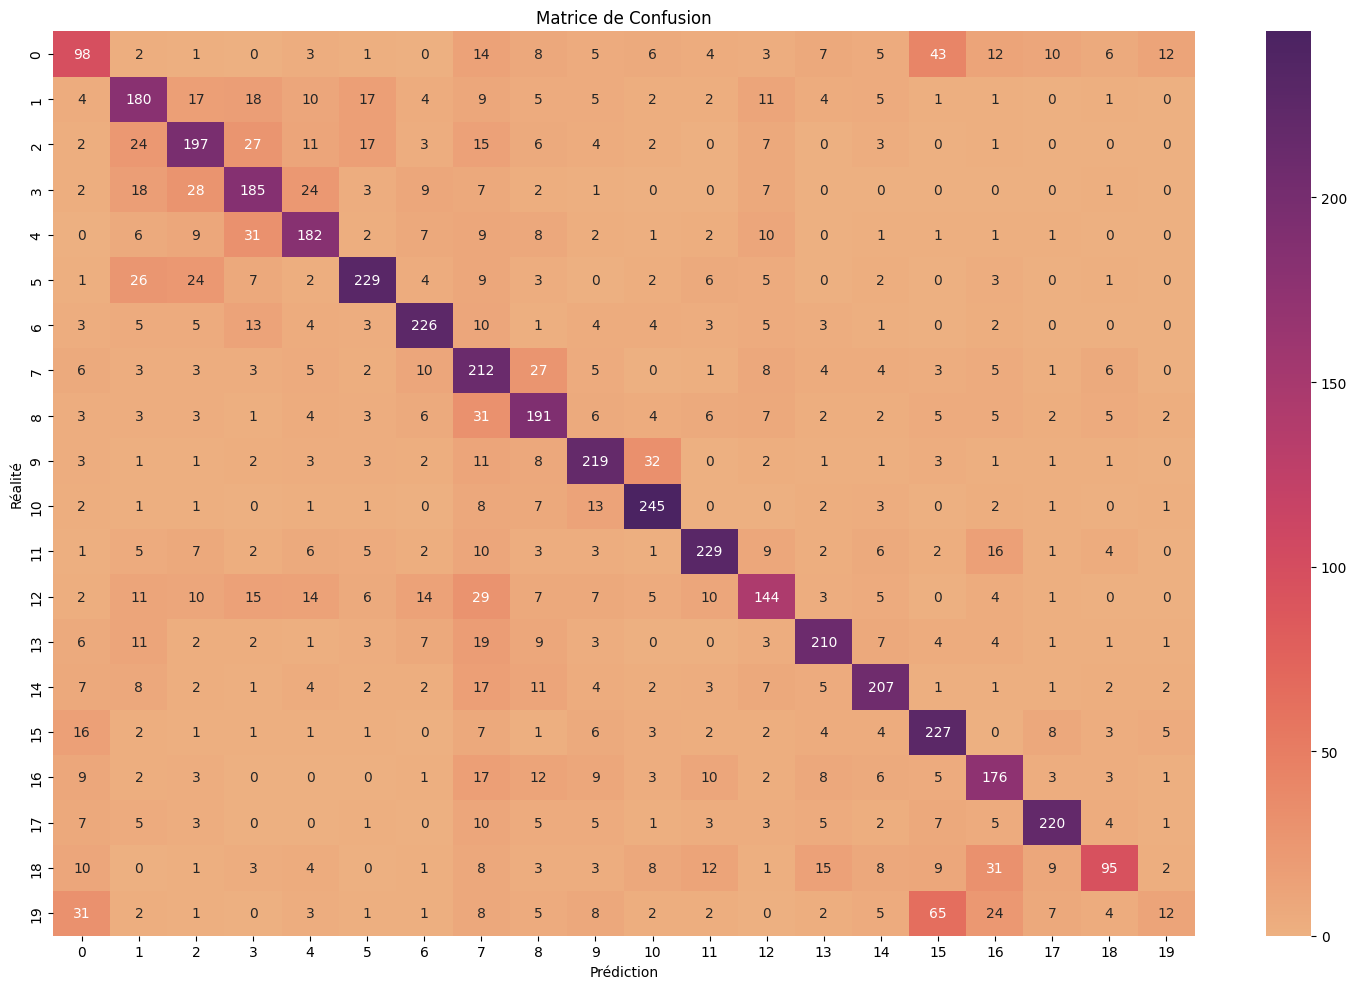

In [24]:
# Création du modèle --> 0.65 d'accuracy - 1 minute et 58 secondes

# L'augmentation de cet hyperparamètre améliore généralement les performances du modèle
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# On appelle notre fonction de classification
classification(random_forest, X_train, y_train, X_test, y_test, "Random Forest")

3) **Naïve Bayes**

 🥁 Chargement ... 🥁
🎄 Résultat : Naïve Bayes 🎄
              precision    recall  f1-score   support

           0       0.92      0.05      0.09       240
           1       0.61      0.59      0.60       296
           2       0.85      0.39      0.54       319
           3       0.42      0.82      0.56       287
           4       0.94      0.50      0.65       273
           5       0.84      0.67      0.75       324
           6       0.84      0.67      0.75       292
           7       0.90      0.55      0.68       308
           8       0.83      0.54      0.66       291
           9       0.92      0.64      0.76       295
          10       0.56      0.83      0.67       288
          11       0.71      0.72      0.71       314
          12       0.70      0.46      0.55       287
          13       0.74      0.70      0.72       294
          14       0.84      0.58      0.69       289
          15       0.17      0.97      0.29       294
          16       0.71      0.40 

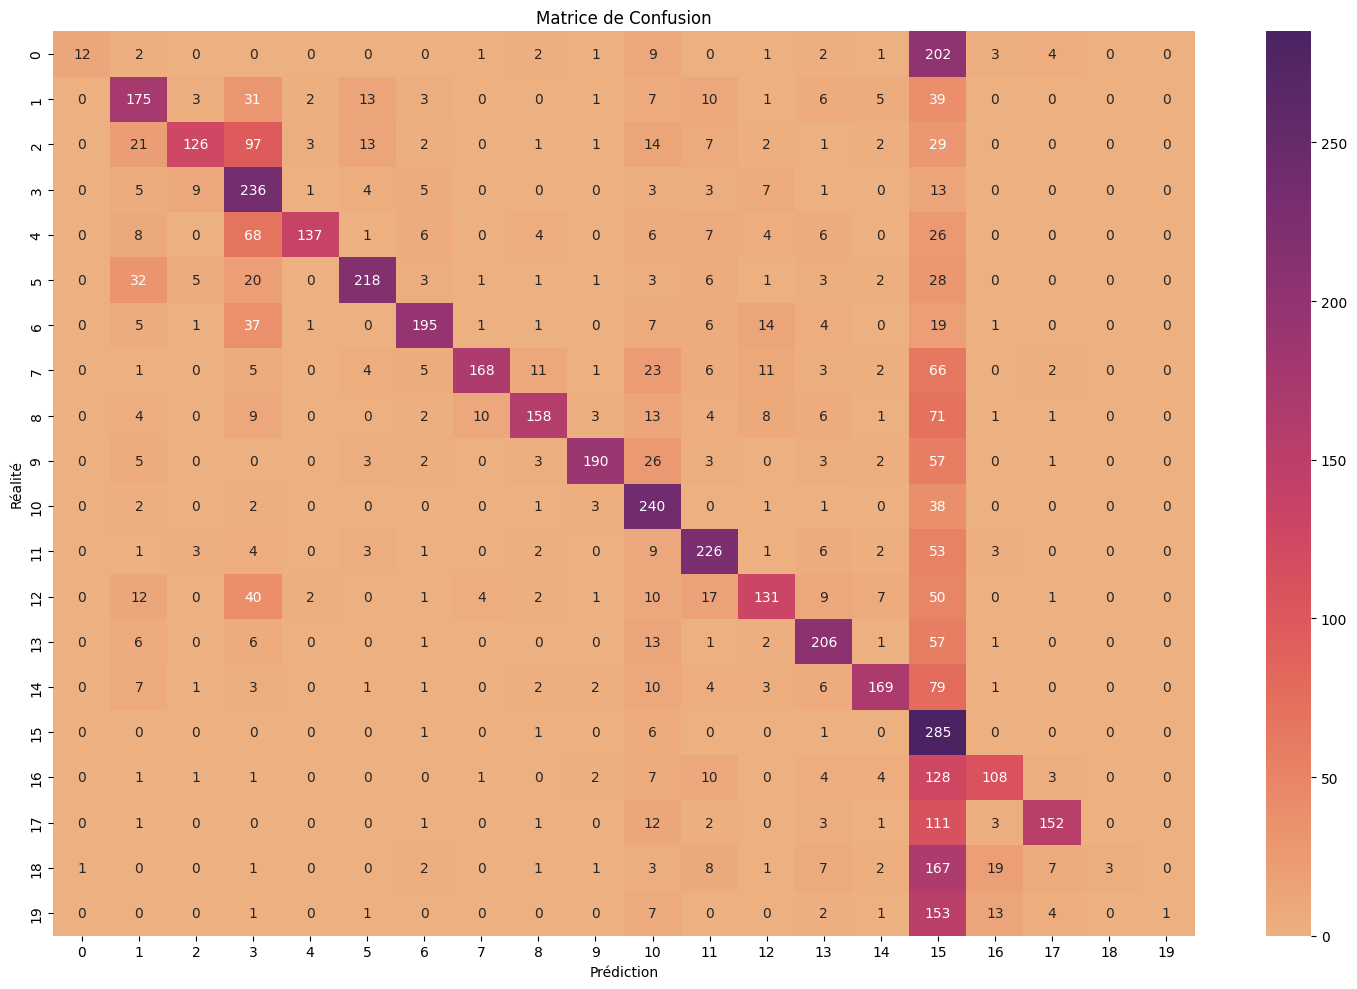

In [25]:
# Création du modèle --> 0.55 d'accuracy - 1 seconde

# En ajoutant des hyperparamètres (comme alpha), cela baissa
naive_bayes = MultinomialNB()

# On appelle notre fonction de classification
classification(naive_bayes, X_train, y_train, X_test, y_test, "Naïve Bayes")

4) **Perceptron**

 🥁 Chargement ... 🥁
🎄 Résultat : Perceptron 🎄
              precision    recall  f1-score   support

           0       0.62      0.37      0.46       240
           1       0.54      0.72      0.62       296
           2       0.59      0.64      0.62       319
           3       0.59      0.68      0.63       287
           4       0.72      0.56      0.63       273
           5       0.85      0.62      0.72       324
           6       0.74      0.72      0.73       292
           7       0.45      0.74      0.56       308
           8       0.77      0.59      0.67       291
           9       0.73      0.80      0.76       295
          10       0.86      0.80      0.83       288
          11       0.69      0.76      0.73       314
          12       0.65      0.63      0.64       287
          13       0.83      0.71      0.76       294
          14       0.73      0.75      0.74       289
          15       0.72      0.53      0.61       294
          16       0.77      0.26  

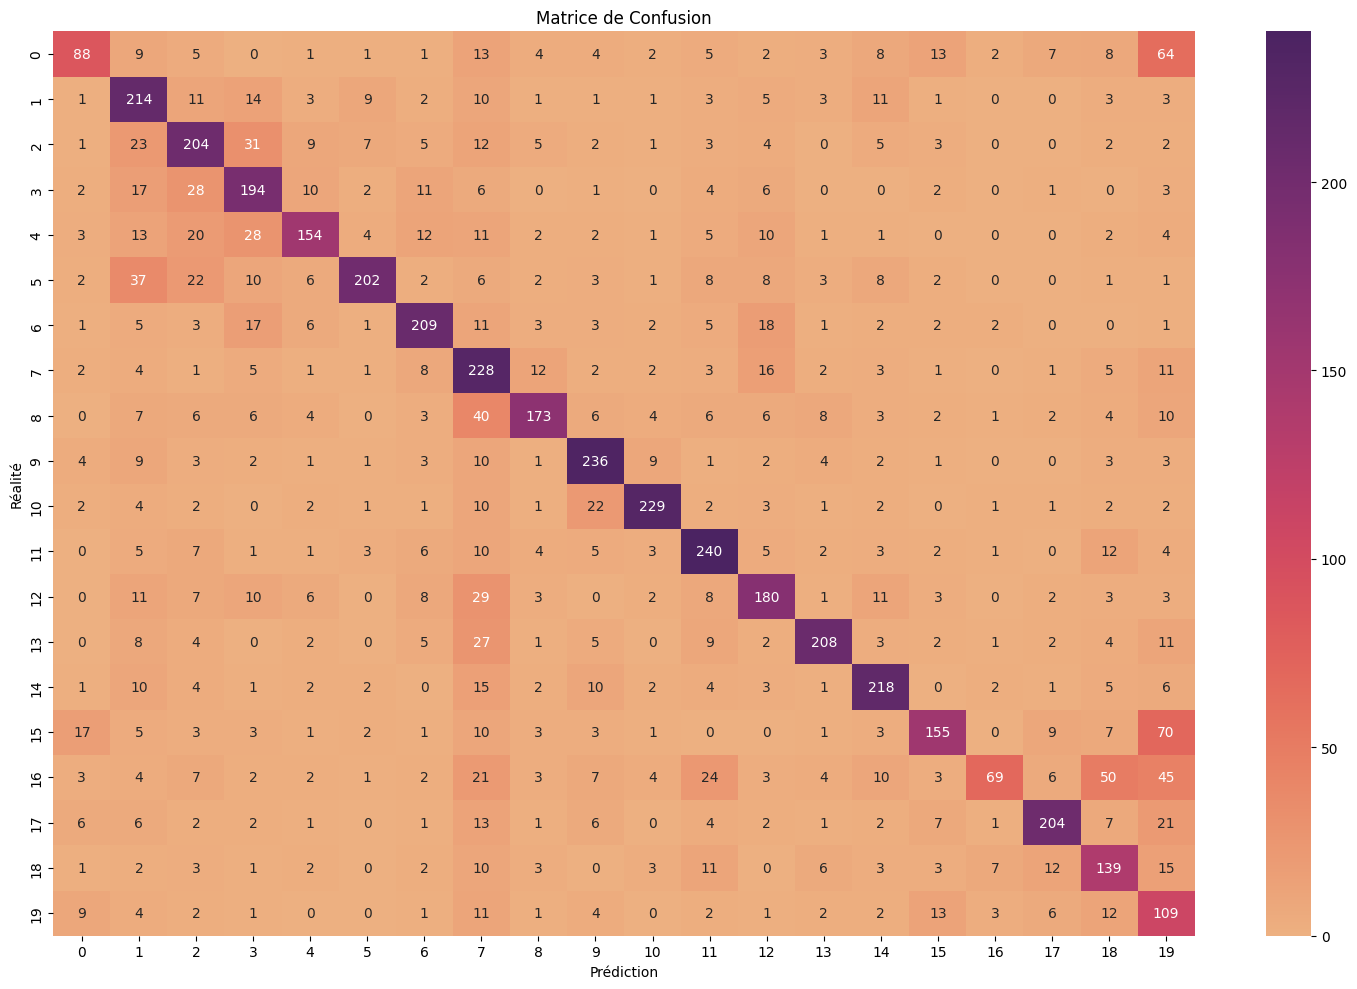

In [26]:
# Création du modèle --> 0.64 d'accuracy - 3 secondes

# L'augmentation de cet hyperparamètre améliore généralement les performances du modèle car il détermine le nombre maximal de passages sur les données d'entraînement (pour ajuster les poids du perceptron).
perceptron = Perceptron(max_iter=1000, random_state=42)

# On appelle notre fonction de classification
classification(perceptron, X_train, y_train, X_test, y_test, "Perceptron")


5) **SVM**

 🥁 Chargement ... 🥁
🎄 Résultat : Support Vector Machine 🎄
              precision    recall  f1-score   support

           0       0.41      0.42      0.41       240
           1       0.60      0.63      0.62       296
           2       0.68      0.56      0.61       319
           3       0.65      0.61      0.63       287
           4       0.65      0.64      0.65       273
           5       0.81      0.61      0.70       324
           6       0.81      0.74      0.77       292
           7       0.55      0.58      0.57       308
           8       0.52      0.60      0.56       291
           9       0.44      0.74      0.55       295
          10       0.88      0.74      0.80       288
          11       0.76      0.65      0.70       314
          12       0.53      0.63      0.58       287
          13       0.66      0.71      0.68       294
          14       0.60      0.69      0.64       289
          15       0.63      0.71      0.67       294
          16       0.57

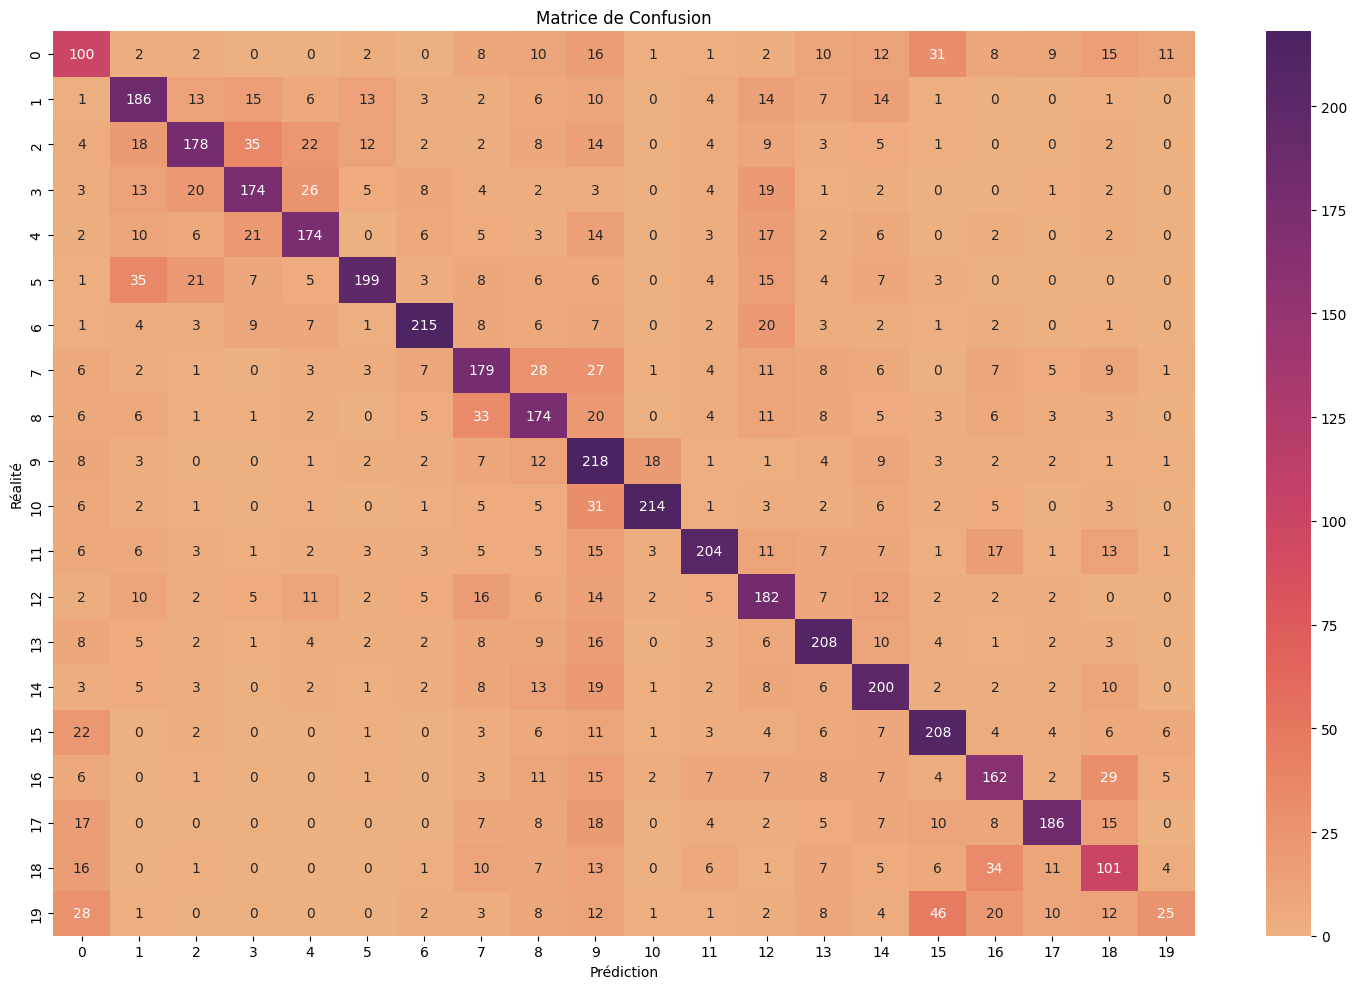

In [27]:
# Création du modèle --> 0.61 d'accuracy - 4 minutes et 32 secondes 

# On fait une séparation linéaire pour le SVM afin que le modèle soit plus rapide
svm = SVC(kernel="linear", random_state=42)

# On appelle notre fonction de classification
classification(svm, X_train, y_train, X_test, y_test, "Support Vector Machine")


6) **Linear SVC**

 🥁 Chargement ... 🥁
🎄 Résultat : Linear SVC 🎄
              precision    recall  f1-score   support

           0       0.60      0.52      0.56       240
           1       0.71      0.70      0.70       296
           2       0.70      0.64      0.67       319
           3       0.66      0.69      0.67       287
           4       0.72      0.71      0.72       273
           5       0.79      0.74      0.76       324
           6       0.80      0.76      0.78       292
           7       0.73      0.69      0.70       308
           8       0.75      0.70      0.73       291
           9       0.56      0.82      0.67       295
          10       0.89      0.90      0.90       288
          11       0.85      0.77      0.81       314
          12       0.67      0.69      0.68       287
          13       0.80      0.83      0.81       294
          14       0.77      0.78      0.78       289
          15       0.65      0.80      0.72       294
          16       0.67      0.71  

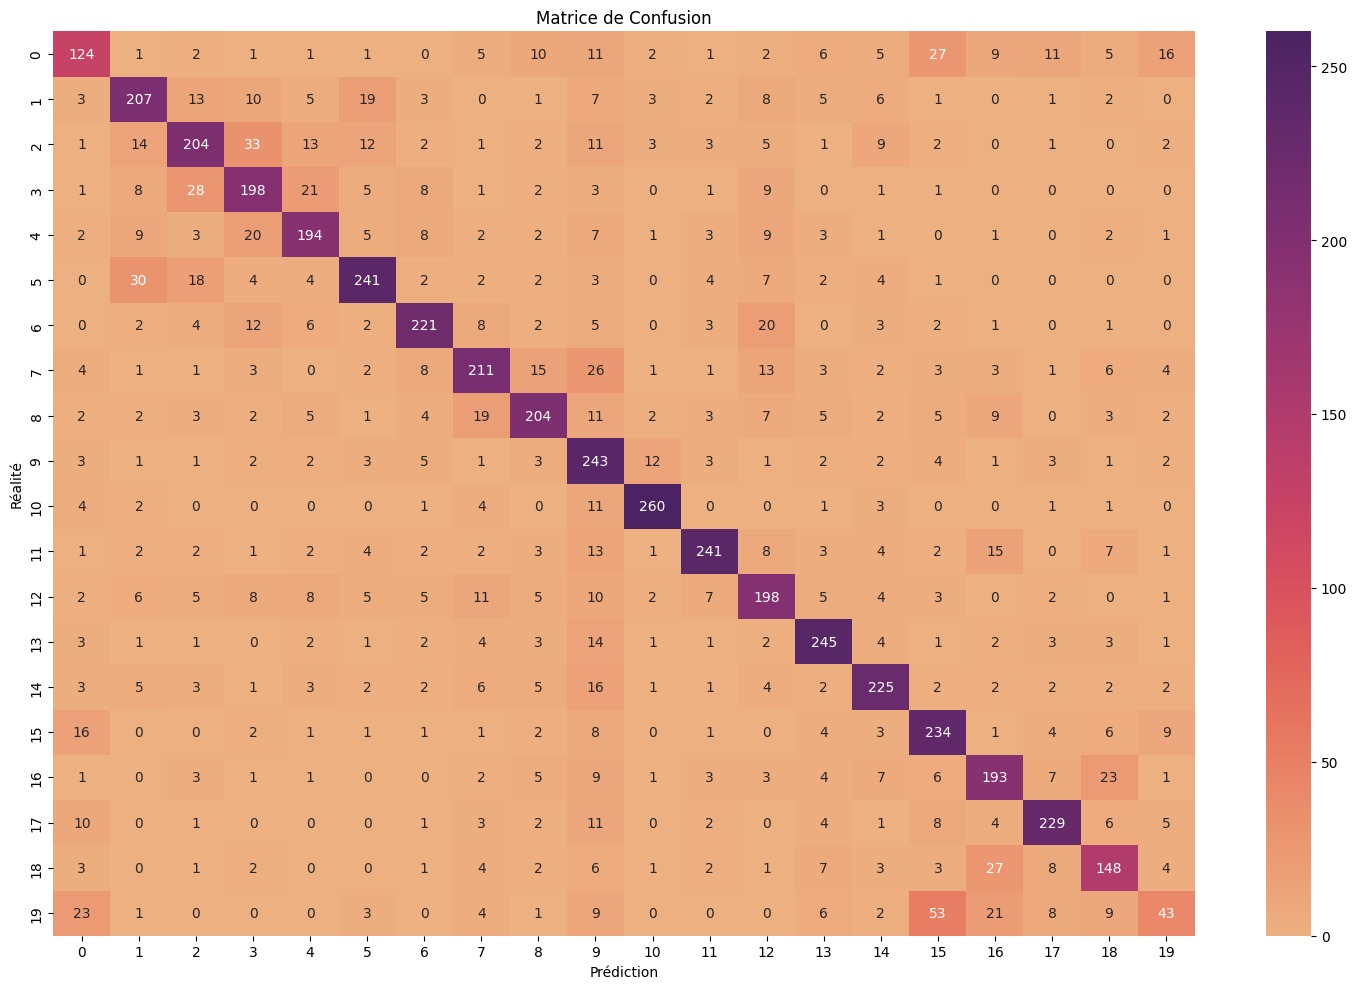

In [28]:
# Création du modèle --> 0.71 d'accuracy - 4 secondes

svc = LinearSVC()

# On appelle notre fonction de classification
classification(svc, X_train, y_train, X_test, y_test, "Linear SVC")


7) **Régression de logistique**

 🥁 Chargement ... 🥁
🎄 Résultat : Régression de Logistique 🎄
              precision    recall  f1-score   support

           0       0.42      0.36      0.39       240
           1       0.59      0.60      0.60       296
           2       0.71      0.55      0.62       319
           3       0.61      0.61      0.61       287
           4       0.67      0.63      0.65       273
           5       0.72      0.64      0.68       324
           6       0.71      0.76      0.73       292
           7       0.66      0.57      0.61       308
           8       0.56      0.63      0.59       291
           9       0.44      0.71      0.54       295
          10       0.78      0.77      0.77       288
          11       0.72      0.66      0.69       314
          12       0.53      0.56      0.55       287
          13       0.61      0.71      0.66       294
          14       0.65      0.68      0.66       289
          15       0.60      0.72      0.66       294
          16       0.

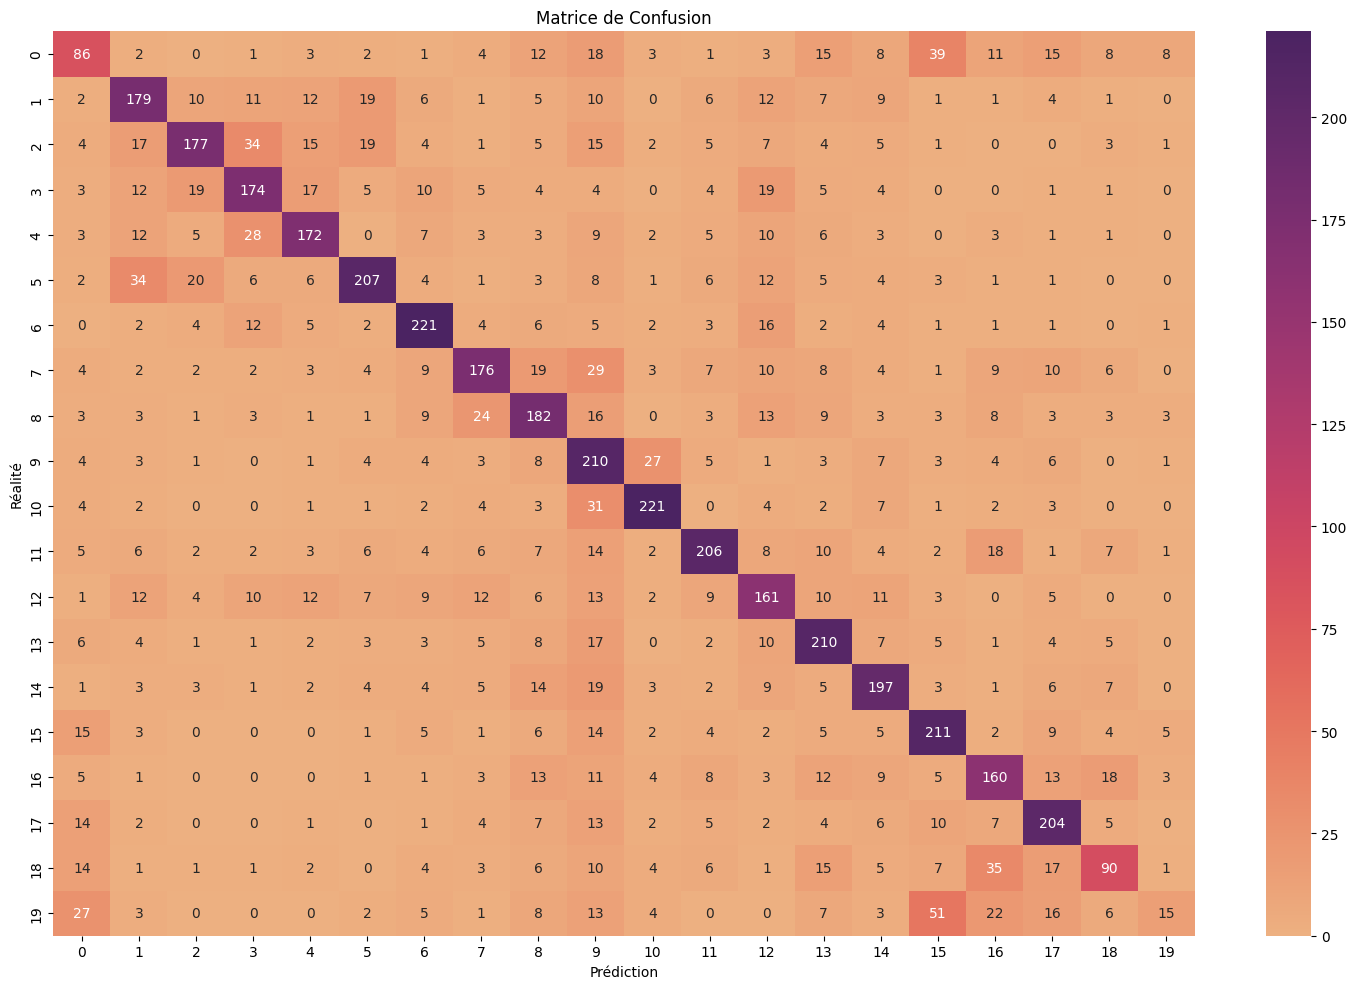

In [29]:
# Création du modèle --> 0.61 d'accuracy - 58 secondes
log_reg = LogisticRegression()

# On appelle notre fonction de classification
classification(log_reg, X_train, y_train, X_test, y_test, "Régression de Logistique")


8) **Complement NB**

 🥁 Chargement ... 🥁
🎄 Résultat : Complement Naive Bayes 🎄
              precision    recall  f1-score   support

           0       0.38      0.45      0.41       240
           1       0.77      0.75      0.76       296
           2       0.77      0.67      0.71       319
           3       0.65      0.76      0.70       287
           4       0.86      0.73      0.79       273
           5       0.79      0.81      0.80       324
           6       0.73      0.79      0.76       292
           7       0.84      0.73      0.78       308
           8       0.85      0.75      0.80       291
           9       0.91      0.86      0.88       295
          10       0.81      0.94      0.87       288
          11       0.82      0.82      0.82       314
          12       0.77      0.63      0.69       287
          13       0.80      0.85      0.82       294
          14       0.85      0.81      0.83       289
          15       0.49      0.91      0.64       294
          16       0.68

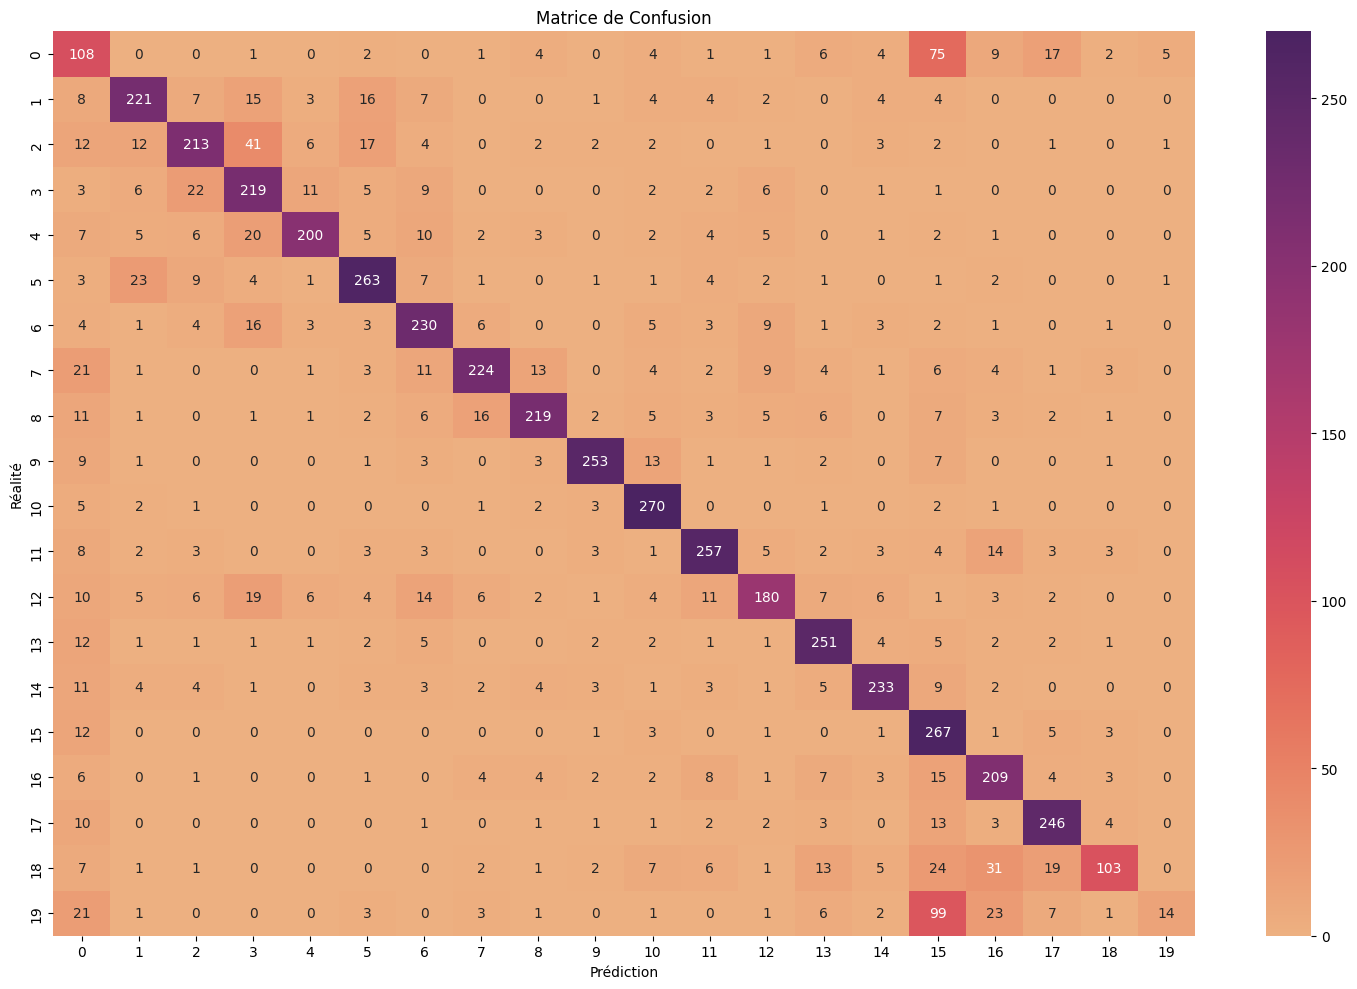

In [15]:
# Création du modèle --> 0.73 d'accuracy - 1 seconde

complemet_nb_all = ComplementNB()
classification(complemet_nb_all, X_train, y_train, X_test, y_test, "Complement Naive Bayes")

________________________________________________________
Nous pouvons observer que l'algorithme **Complement NB** nous donne une meilleure classification, avec un score de 0,73. Il gère  les données textuelles de haute dimension et compense les déséquilibres entre les classes en ajustant les probabilités conditionnelles. De plus, il est robuste face au bruit dans les données, ce qui améliore la précision de la classification dans des contextes complexes comme notre dataset 20newsgroups.



De plus, nous avons constaté qu'en ajustant les hyperparamètres, le temps de chargement augmentait considérablement (1h), et les résultats se dégradaient. Nous avons donc opté pour des hyperparamètres simples, voire aucune modification.

Par ailleurs, nous avons tenté d'utiliser un GridSearch et un AdaBoost pour Random Forest, Linear SVC et SVM, mais malheureusement, les résultats étaient également moins bons et prenaient beaucoup de temps.

Ainsi, nous avons envisagé de vectoriser et de prétraiter le corpus 20 Newsgroups. Nous allons maintenant vérifier si cela peut améliorer nos performances.
____________________________________________

### Étape 3 : (Re)Vectorisation

In [16]:
# On importe les librairies 
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
# Revectoriser le corpus en utilisant TF-IDF

# On va supprimer les mots vides en anglais, applique une transformation logarithmique sur les fréquences des termes et exclut les termes présents dans plus de 70% des documents.
tfidf_vectorizer = TfidfVectorizer(stop_words="english", sublinear_tf=True, max_df=0.7)

# Utiliser les données brutes au lieu des données vectorisées
raw_data = fetch_20newsgroups(subset="all", remove=("headers", "footers", "quotes"))
X_tfidf = tfidf_vectorizer.fit_transform(raw_data.data)
y = raw_data.target

# Diviser les données en ensembles d'entraînement (train) et de test (test)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)


In [18]:
# On redéfinit notre fonction de classification
def classification_vectorizer(model, X_train, y_train, X_test, y_test, model_name):
    """
    Cette fonction permet d'entrainer et évaluer un modèle de Régression Logistique.
    
    Paramètres :
    - model: Le modèle d'apprentissage à entrainer.
    - X_train: Les données d'entraînement.
    - y_train: Les labels d'entraînement.
    - X_test: Les données de test.
    - y_test: Les labels de test.
    - model_name: Le nom de l'algorithme de classification.
    """
    print(" 🥁 Chargement ... 🥁")
    
    # On entraine notre modèle
    model.fit(X_train, y_train)
    
    # On prédit les labels sur le jeu de test
    y_pred = model.predict(X_test)
    
    # On affiche les résultats de la classification
    print(f"🎄 Résultat : {model_name} 🎄")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

    # On affiche notre matrice de confusion
    print("🎨 Matrice de Confusion 🎨")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(15, 10))
    sns.heatmap(cm, fmt="d", annot=True, cmap="flare")
    plt.title("Matrice de Confusion")
    plt.xlabel("Prédiction")
    plt.ylabel("Réalité")
    plt.tight_layout()
    plt.show()


1) **Arbre de décision**

 🥁 Chargement ... 🥁
🎄 Résultat : Arbre de Décision 🎄
              precision    recall  f1-score   support

           0       0.36      0.34      0.35       236
           1       0.37      0.37      0.37       287
           2       0.46      0.48      0.47       290
           3       0.40      0.41      0.40       285
           4       0.56      0.43      0.49       312
           5       0.61      0.56      0.58       308
           6       0.52      0.53      0.53       276
           7       0.28      0.56      0.38       304
           8       0.54      0.56      0.55       279
           9       0.54      0.50      0.52       308
          10       0.65      0.60      0.62       309
          11       0.64      0.56      0.60       290
          12       0.34      0.36      0.35       304
          13       0.60      0.56      0.58       300
          14       0.52      0.51      0.51       297
          15       0.50      0.52      0.51       292
          16       0.47     

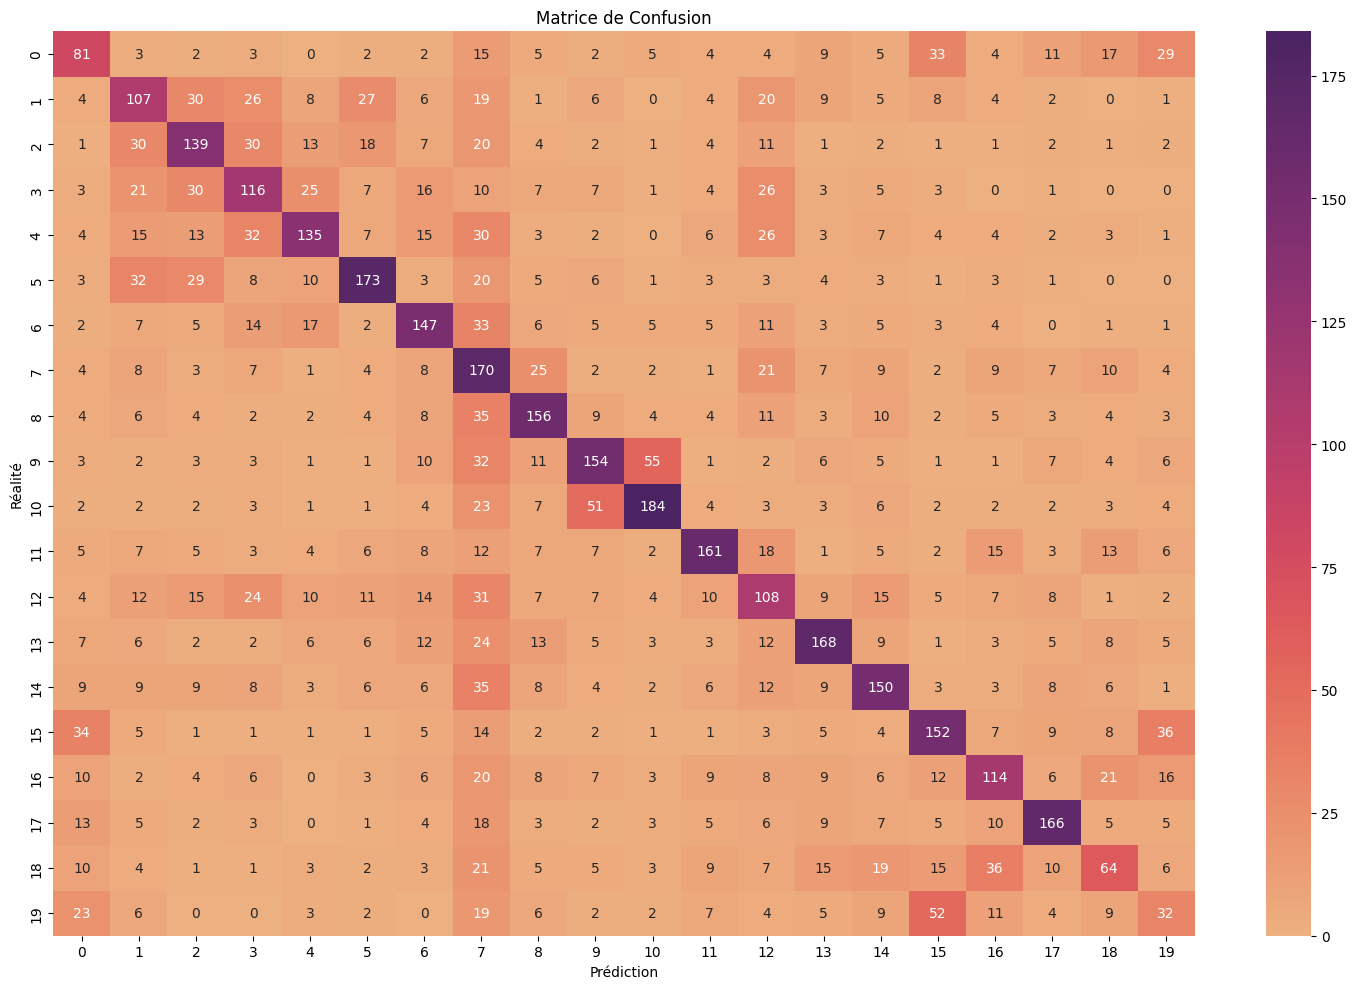

In [33]:
# Création du modèle --> 0.47 d'accuracy - 37 secondes
tree_model_vectorized = DecisionTreeClassifier(random_state=42)

# On appelle notre fonction de classification
classification_vectorizer(tree_model_vectorized, X_train_tfidf, y_train, X_test_tfidf, y_test, "Arbre de Décision")

2) **Random Forest**

 🥁 Chargement ... 🥁
🎄 Résultat : Random Forest 🎄
              precision    recall  f1-score   support

           0       0.55      0.45      0.50       236
           1       0.58      0.61      0.59       287
           2       0.64      0.69      0.66       290
           3       0.54      0.65      0.59       285
           4       0.78      0.62      0.69       312
           5       0.75      0.74      0.74       308
           6       0.66      0.68      0.67       276
           7       0.45      0.74      0.56       304
           8       0.68      0.73      0.71       279
           9       0.76      0.74      0.75       308
          10       0.80      0.84      0.82       309
          11       0.78      0.72      0.75       290
          12       0.60      0.50      0.54       304
          13       0.79      0.75      0.77       300
          14       0.72      0.70      0.71       297
          15       0.62      0.76      0.68       292
          16       0.63      0.7

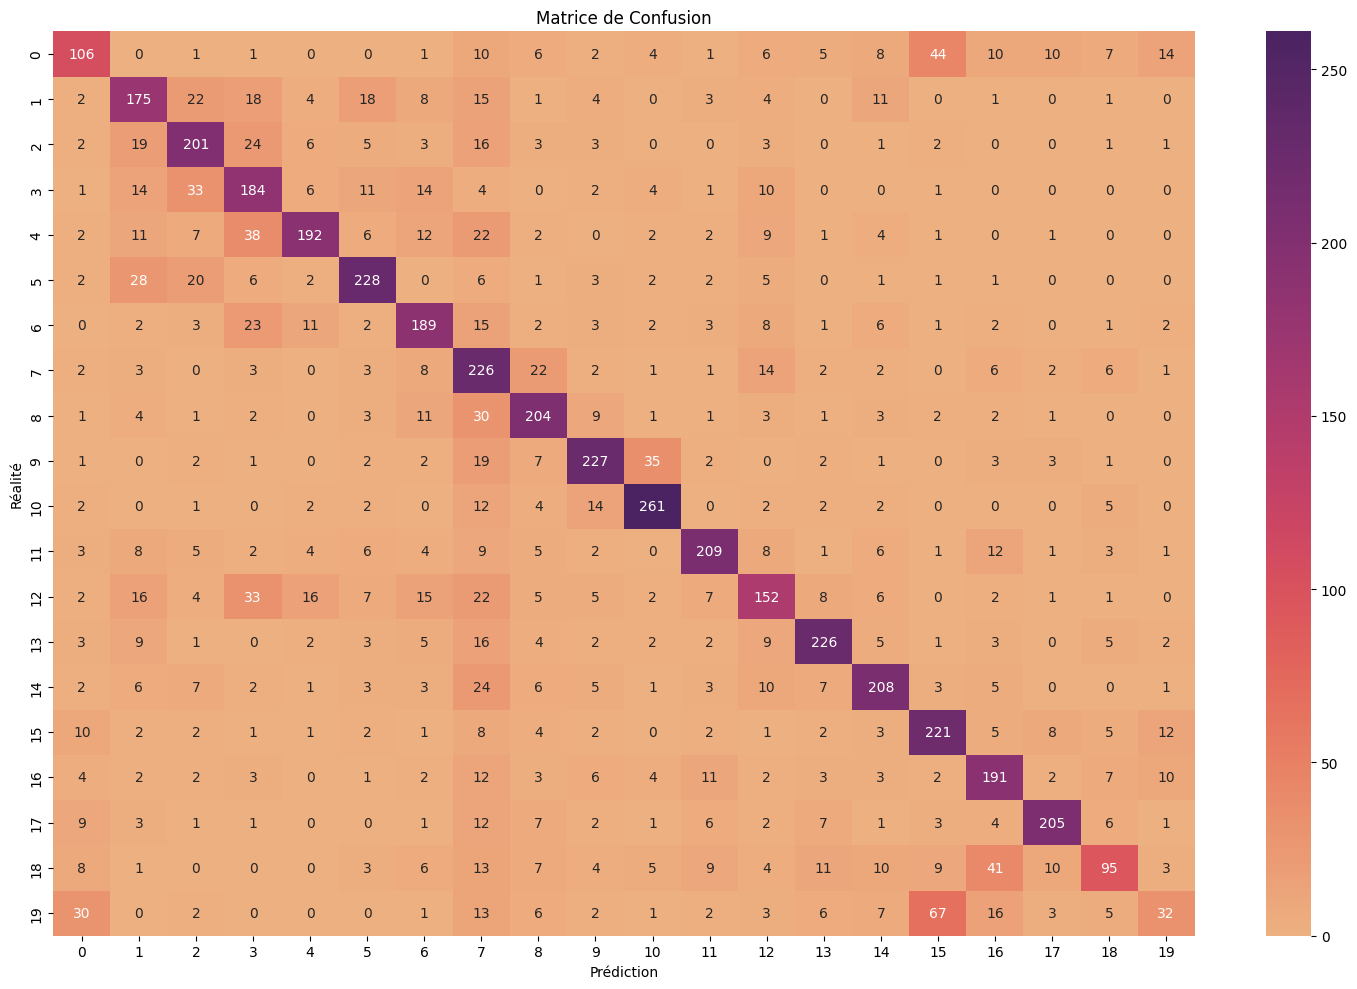

In [34]:
# Création du modèle --> 0.66 d'accuracy - 3 minutes

random_forest_vectorizer = RandomForestClassifier(n_estimators=100, random_state=42)

# On appelle notre fonction de classification
classification_vectorizer(random_forest_vectorizer, X_train_tfidf, y_train, X_test_tfidf, y_test, "Random Forest")


3) **Naïve Bayes**

 🥁 Chargement ... 🥁
🎄 Résultat : Naïve Bayes 🎄
              precision    recall  f1-score   support

           0       0.80      0.20      0.32       236
           1       0.66      0.70      0.68       287
           2       0.72      0.66      0.69       290
           3       0.57      0.79      0.66       285
           4       0.88      0.62      0.73       312
           5       0.89      0.80      0.84       308
           6       0.73      0.71      0.72       276
           7       0.86      0.74      0.80       304
           8       0.52      0.79      0.63       279
           9       0.94      0.83      0.88       308
          10       0.91      0.91      0.91       309
          11       0.62      0.82      0.71       290
          12       0.84      0.59      0.69       304
          13       0.91      0.81      0.85       300
          14       0.86      0.79      0.82       297
          15       0.36      0.95      0.52       292
          16       0.72      0.75 

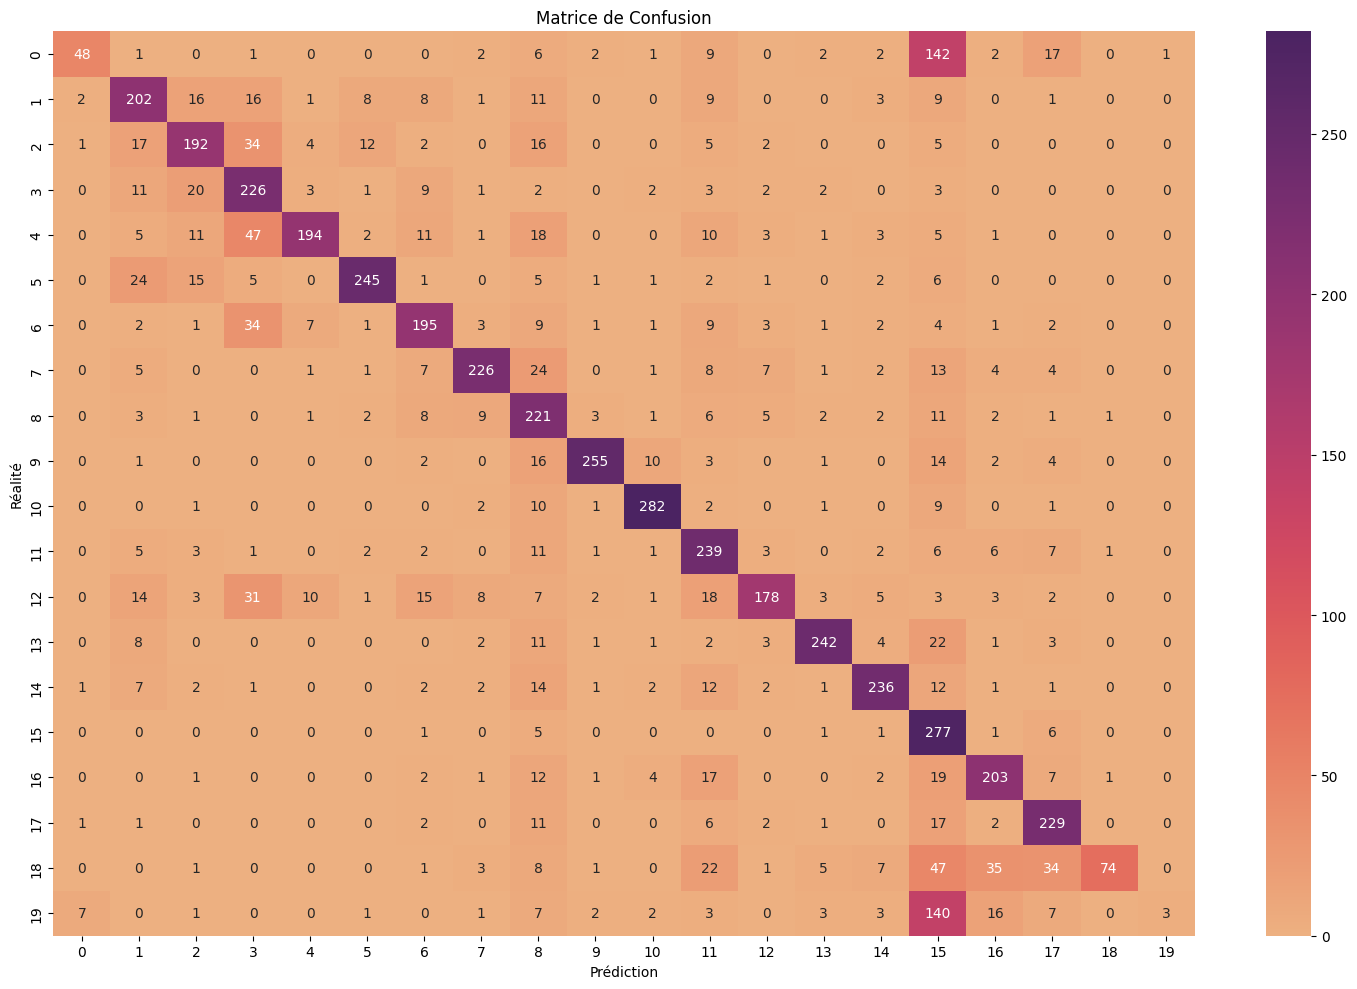

In [35]:
# Création du modèle --> 0.70 d'accuracy - 1 seconde
naive_bayes_vectorizer = MultinomialNB()

# On appelle notre fonction de classification
classification_vectorizer(naive_bayes_vectorizer, X_train_tfidf, y_train, X_test_tfidf, y_test, "Naïve Bayes")

4) **Perceptron**

 🥁 Chargement ... 🥁
🎄 Résultat : Perceptron 🎄
              precision    recall  f1-score   support

           0       0.61      0.53      0.57       236
           1       0.69      0.64      0.66       287
           2       0.64      0.66      0.65       290
           3       0.63      0.62      0.63       285
           4       0.75      0.64      0.69       312
           5       0.77      0.75      0.76       308
           6       0.71      0.66      0.68       276
           7       0.49      0.78      0.60       304
           8       0.78      0.72      0.75       279
           9       0.85      0.80      0.82       308
          10       0.87      0.86      0.86       309
          11       0.79      0.75      0.77       290
          12       0.65      0.60      0.62       304
          13       0.78      0.80      0.79       300
          14       0.71      0.75      0.73       297
          15       0.67      0.69      0.68       292
          16       0.61      0.61  

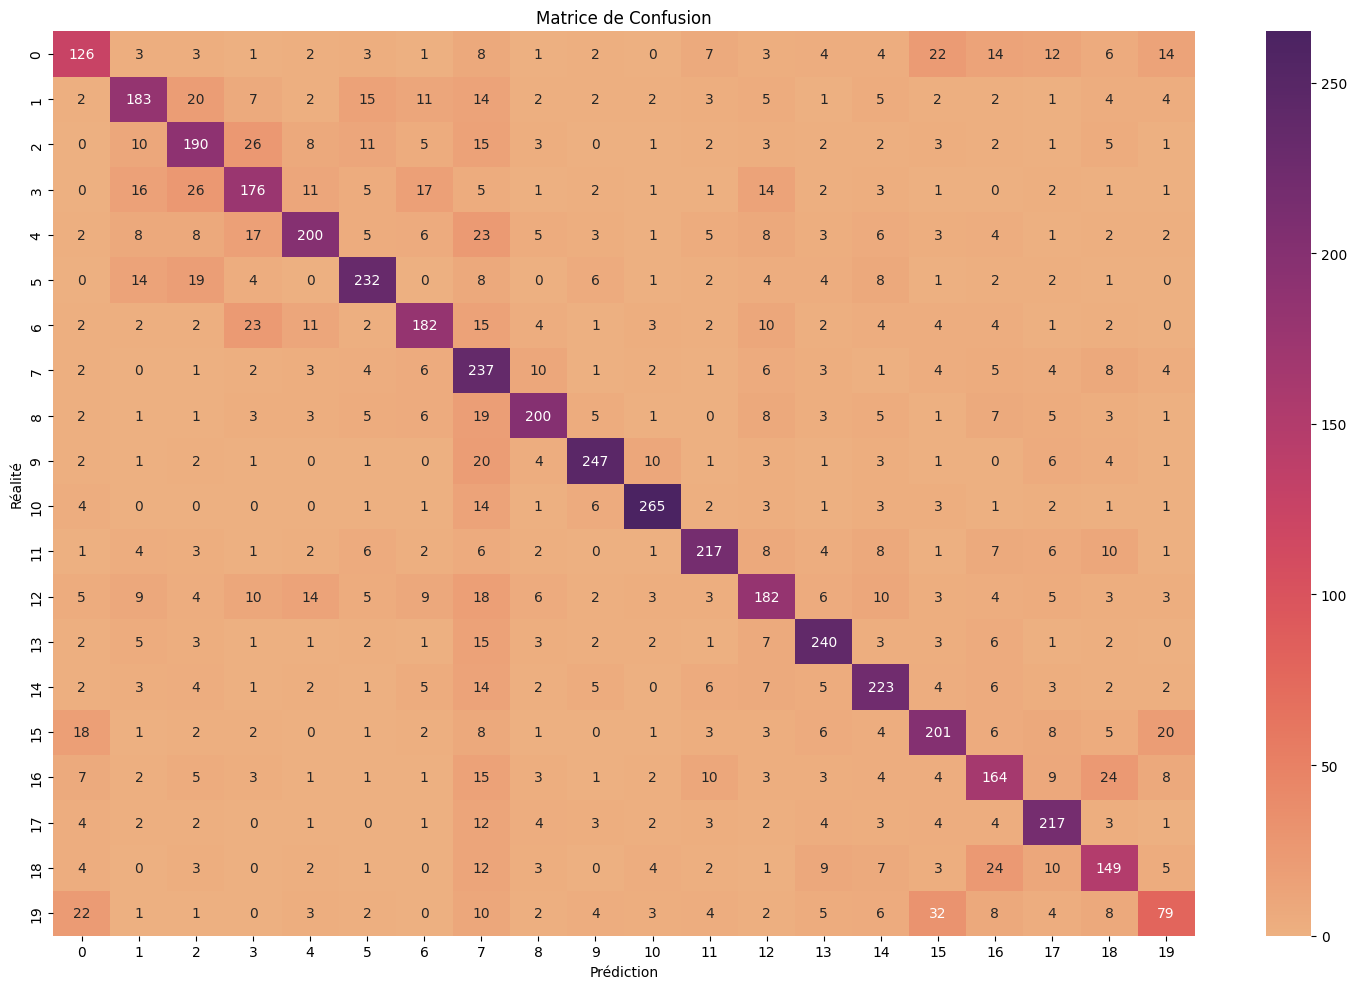

In [36]:
# Création du modèle --> 0.69 d'accuracy - 2 secondes
perceptron_vectorizer = Perceptron(max_iter=1000, random_state=42)

# On appelle notre fonction de classification
classification_vectorizer(perceptron_vectorizer, X_train_tfidf, y_train, X_test_tfidf, y_test, "Perceptron")

5) **SVM**

 🥁 Chargement ... 🥁
🎄 Résultat : Support Vector Machine 🎄
              precision    recall  f1-score   support

           0       0.61      0.64      0.63       236
           1       0.70      0.75      0.73       287
           2       0.72      0.67      0.69       290
           3       0.68      0.68      0.68       285
           4       0.80      0.70      0.75       312
           5       0.89      0.78      0.83       308
           6       0.76      0.71      0.74       276
           7       0.74      0.75      0.75       304
           8       0.45      0.82      0.58       279
           9       0.90      0.85      0.87       308
          10       0.97      0.85      0.91       309
          11       0.90      0.77      0.83       290
          12       0.61      0.73      0.67       304
          13       0.81      0.82      0.81       300
          14       0.78      0.80      0.79       297
          15       0.75      0.77      0.76       292
          16       0.72

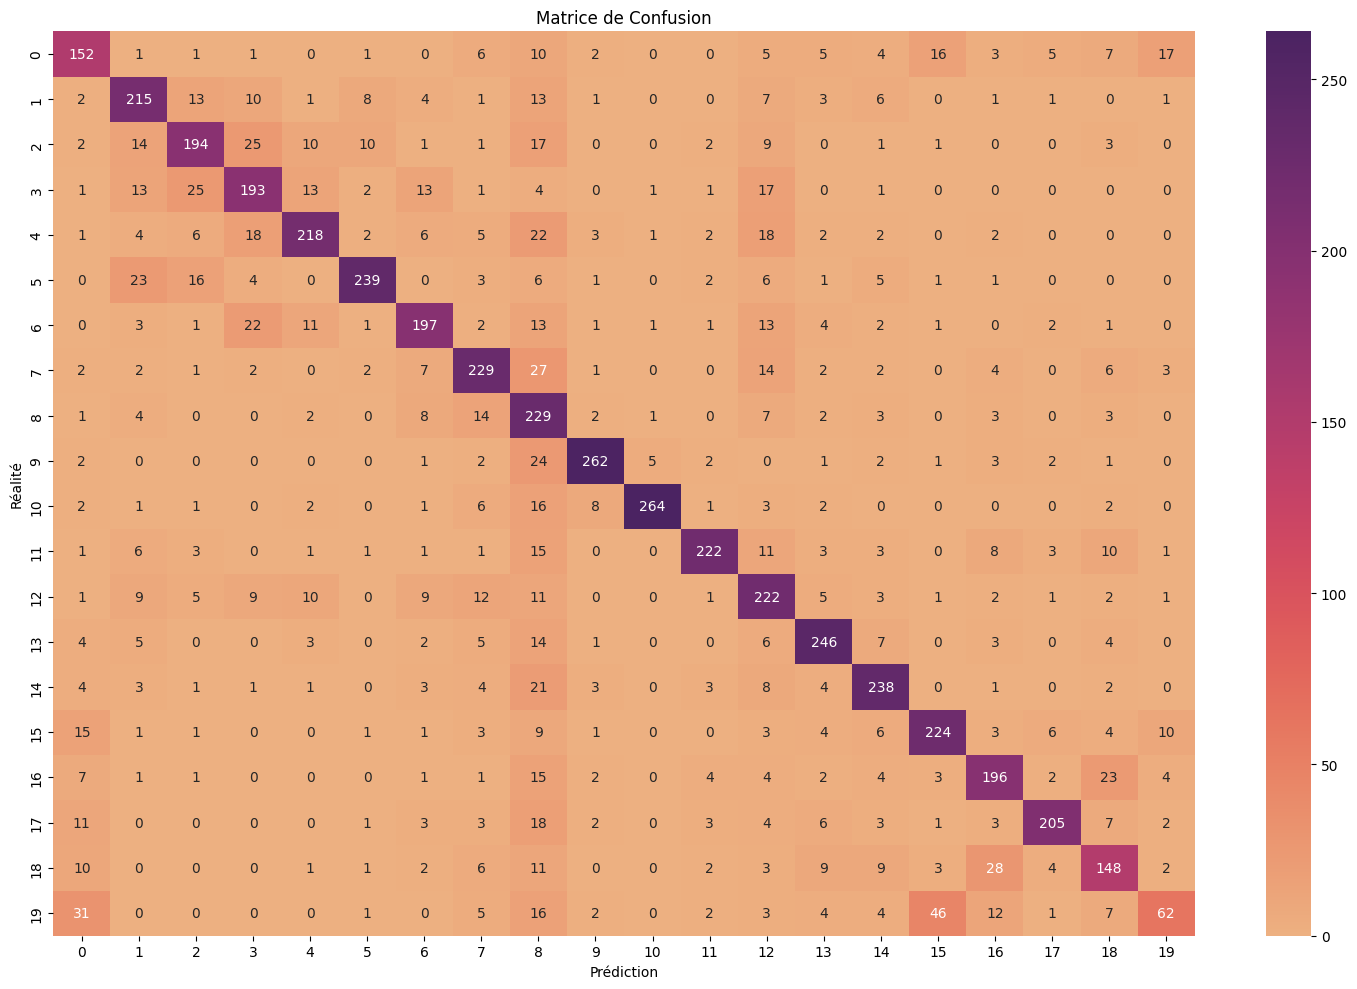

In [37]:
# Création du modèle --> 0.73 d'accuracy - 3 minutes et 52 secondes
svm_vectorizer = SVC(kernel="linear", random_state=42)

# On appelle notre fonction de classification
classification_vectorizer(svm_vectorizer, X_train_tfidf, y_train, X_test_tfidf, y_test, "Support Vector Machine")

6) **Régression de logistique**

 🥁 Chargement ... 🥁
🎄 Résultat : Régression Logistique 🎄
              precision    recall  f1-score   support

           0       0.61      0.57      0.59       236
           1       0.72      0.72      0.72       287
           2       0.73      0.70      0.71       290
           3       0.67      0.67      0.67       285
           4       0.83      0.70      0.76       312
           5       0.86      0.79      0.82       308
           6       0.73      0.70      0.72       276
           7       0.81      0.75      0.78       304
           8       0.46      0.83      0.59       279
           9       0.89      0.85      0.87       308
          10       0.94      0.89      0.91       309
          11       0.89      0.77      0.82       290
          12       0.62      0.72      0.66       304
          13       0.80      0.86      0.83       300
          14       0.81      0.82      0.82       297
          15       0.67      0.80      0.73       292
          16       0.71 

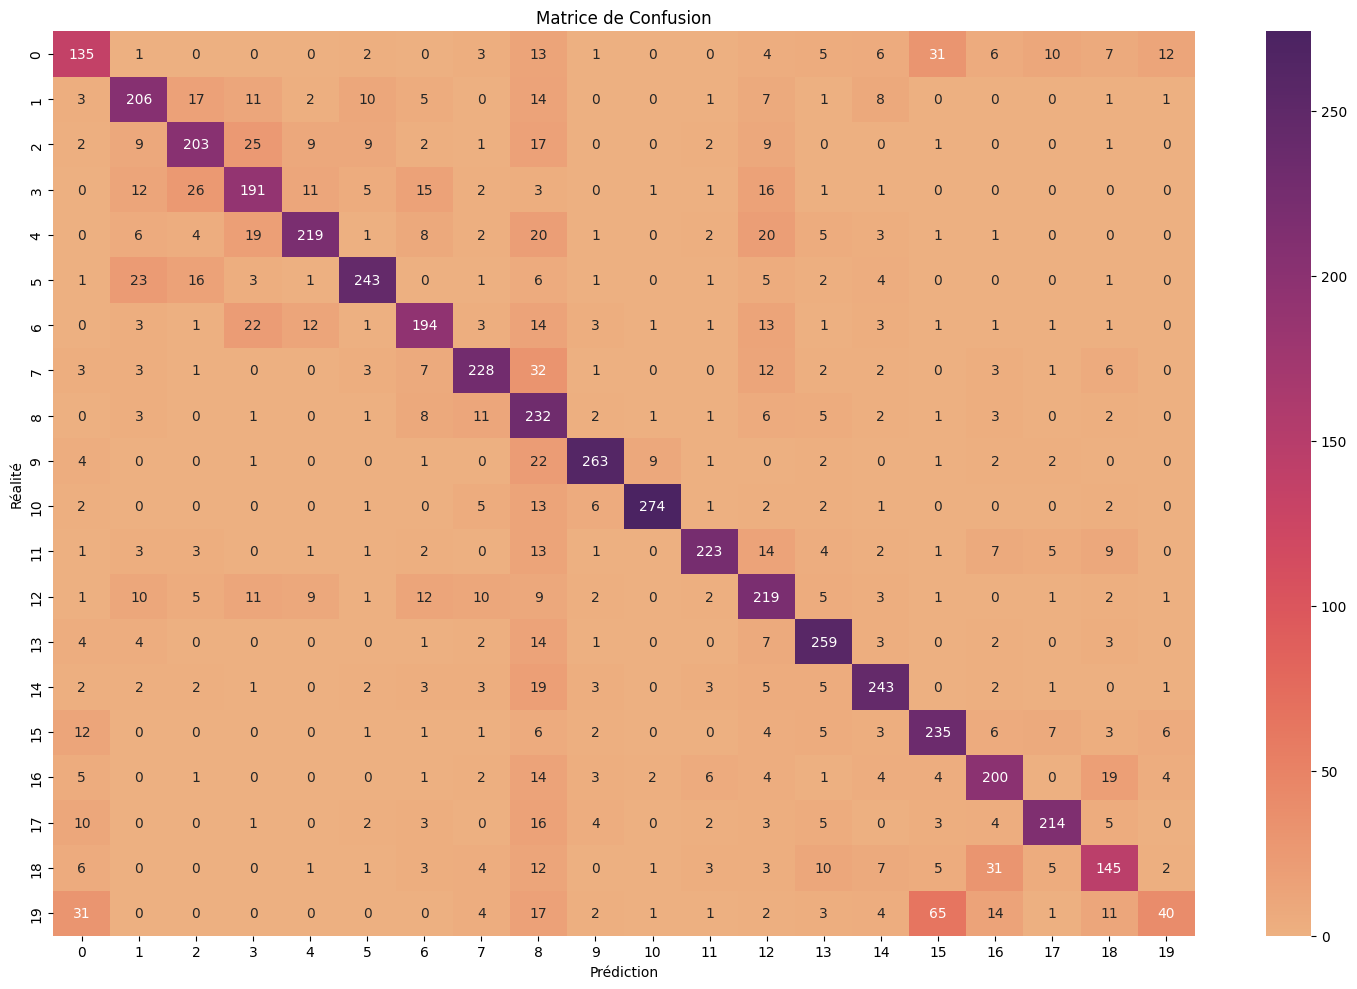

In [38]:
# Création du modèle --> 0.73 d'accuracy - 32 secondes
log_reg_vectorized = LogisticRegression()

# On appelle notre fonction de classification
classification_vectorizer(log_reg_vectorized, X_train_tfidf, y_train, X_test_tfidf, y_test, "Régression Logistique")

7) **Linear SVC**

 🥁 Chargement ... 🥁
🎄 Résultat : Linear SVC 🎄
              precision    recall  f1-score   support

           0       0.67      0.64      0.66       236
           1       0.75      0.73      0.74       287
           2       0.70      0.70      0.70       290
           3       0.68      0.71      0.69       285
           4       0.79      0.71      0.75       312
           5       0.85      0.80      0.82       308
           6       0.73      0.72      0.72       276
           7       0.52      0.82      0.64       304
           8       0.84      0.80      0.82       279
           9       0.89      0.86      0.88       308
          10       0.93      0.89      0.91       309
          11       0.87      0.81      0.84       290
          12       0.71      0.71      0.71       304
          13       0.87      0.86      0.86       300
          14       0.82      0.80      0.81       297
          15       0.72      0.81      0.76       292
          16       0.71      0.72  

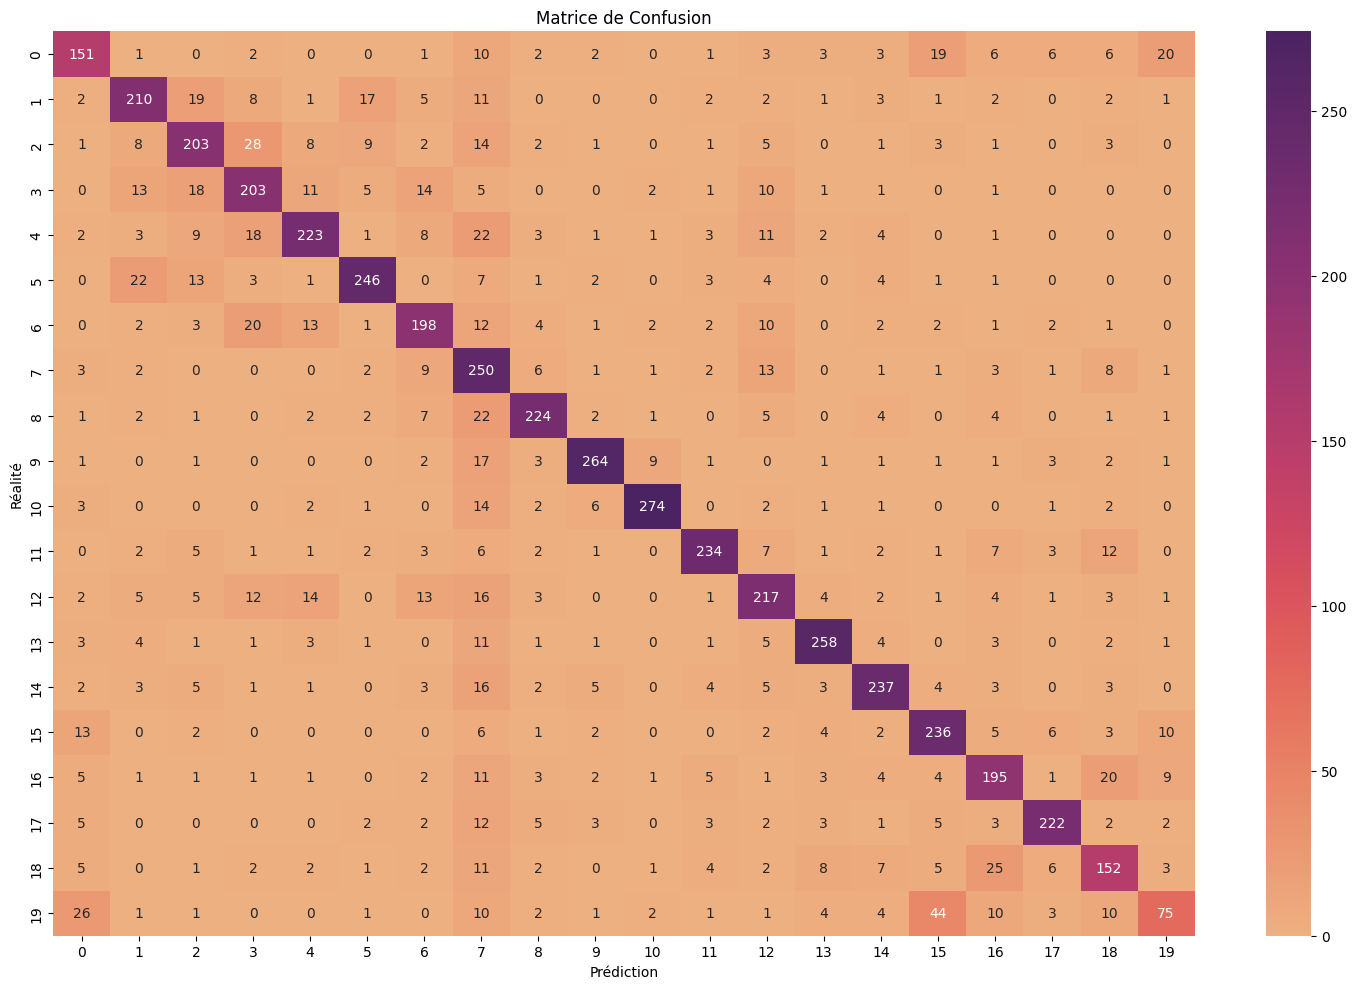

In [39]:
# Création du modèle --> 0.75 d'accuracy - 3 secondes

svc_vectorizer = LinearSVC()

# On appelle notre fonction de classification
classification_vectorizer(svc_vectorizer, X_train_tfidf, y_train, X_test_tfidf, y_test, "Linear SVC")


8) **Complement NB**

 🥁 Chargement ... 🥁
🎄 Résultat : Complement Naive Bayes 🎄
              precision    recall  f1-score   support

           0       0.35      0.50      0.41       236
           1       0.77      0.76      0.76       287
           2       0.75      0.70      0.72       290
           3       0.64      0.76      0.70       285
           4       0.87      0.71      0.78       312
           5       0.86      0.84      0.85       308
           6       0.73      0.70      0.71       276
           7       0.86      0.78      0.82       304
           8       0.88      0.82      0.85       279
           9       0.92      0.86      0.89       308
          10       0.87      0.92      0.89       309
          11       0.81      0.83      0.82       290
          12       0.81      0.68      0.74       304
          13       0.87      0.88      0.87       300
          14       0.83      0.84      0.83       297
          15       0.57      0.90      0.70       292
          16       0.71

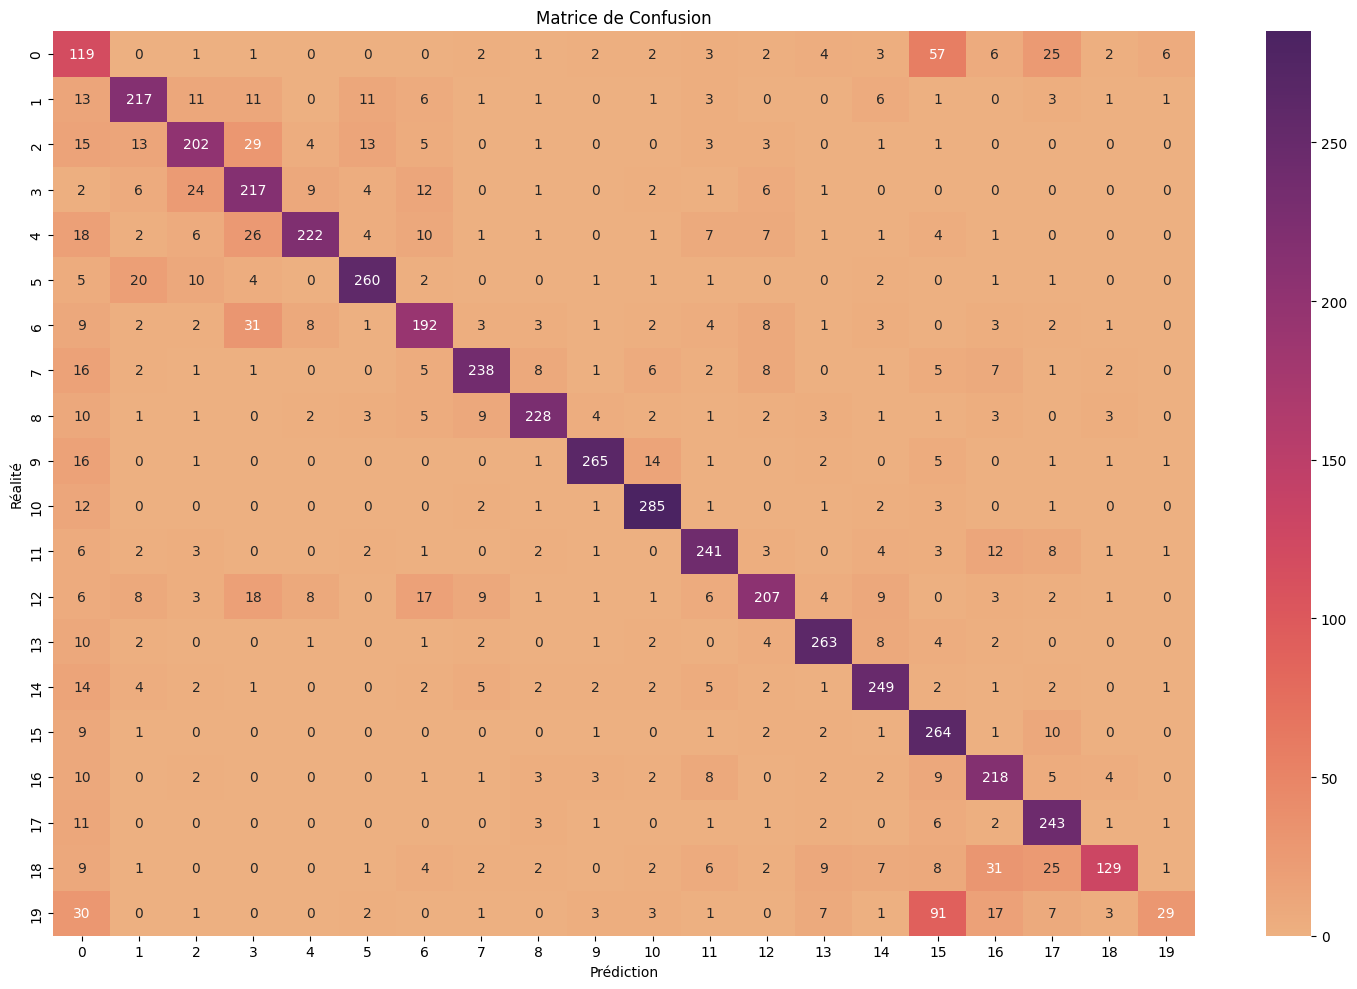

In [21]:
# Création du modèle --> 0.75 d'accuracy - 1 seconde

complemet_nb_vectorizer = ComplementNB()
classification_vectorizer(complemet_nb_vectorizer, X_train_tfidf, y_train, X_test_tfidf, y_test, "Complement Naive Bayes")

_________________________________________________________________________

Après avoir appliqué la vectorisation et le prétraitement du corpus, nous avons constaté une amélioration significative des scores pour tous les algorithmes de classification utilisés.

Notre meilleure performance a été obtenue avec **Complement NB** et **le Linear SVC**, qui a atteint un taux de classification de **75 %**. Bien que cela soit un résultat encourageant, nous avions espéré atteindre un taux de classification plus élevé, compris entre 80 % et 90 %. Malheureusement, nous n'avons pas réussi à atteindre cet objectif, malgré les nombreux essais de paramètres que nous avons effectués.

Il est important de noter que certaines approches, telles que le GridSearch et l'AdaBoost, ont nécessité un temps de calcul très long (plus d'une heure) et n'ont pas abouti à des résultats significativement meilleurs. En effet, ces approches ont souvent conduit à des résultats faibles, ce qui nous a amenés à les abandonner.

Voici un tableau récapitulatif de tous les scores obtenus, qui permet de comparer les performances des différents algorithmes de classification utilisés dans ce projet. :

| Algorithmes              | Standard   |   All     | (Re)Vectorisation |
| :----------------------: |  :-------: | :------:  | :-----------: |
| Arbre de décision        |    0,41    |   0,44    |      0.47     |
| Random Forest            |    0,59    |   0,65    |      0.66     |
| Naïve Bayes              |    0,47    |   0,55    |      0.70     |
| Perceptron               |    0,56    |   0,64    |      0.69     |
| Support Vector Machine   |    0,56    |   0,61    |      0.73     |
| Linear SVC              |    0,66    |  0,71|      **0.75** |
| Régression de logistique |    0,56    |   0,61    |      0.73     |
| **Complement NB** |    **0,69**    |   **0,73**    |     **0,75**      |

______________________________________________________________________________



